### imports

In [1]:
import os
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from google.oauth2 import service_account
from ebmdatalab import bq

pd.set_option("display.max_columns", None)

### data extraction

In [2]:
load_dotenv()

credentials = os.environ["EBMDATALAB_BQ_CREDENTIALS_PATH"]

PROJECT_ID = "ebmdatalab"

credentials = service_account.Credentials.from_service_account_file(credentials)

In [3]:
midazolam_query = f"SELECT * FROM scmd.scmd_full WHERE vmp_name LIKE '%Midazolam%'"

df_midazolam = bq.cached_read(sql=midazolam_query, csv_path="../data/scmd_midazolam.csv", use_cache=True)

In [4]:
df_midazolam.dropna(inplace=True) # drop any NaN values
df_midazolam.head()

,year_month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,df_ind,udfs,udfs_uom,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description
79,2019-04-01,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular
80,2019-04-01,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal
81,2019-04-01,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intravenous
82,2019-04-01,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular
83,2019-04-01,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal


In [5]:
df_midazolam.columns

Index(['year_month', 'indicative_cost', 'quantity', 'uom', 'ods_code',
       'ods_name', 'region', 'vmp_code', 'vtm', 'vtm_name', 'df_ind', 'udfs',
       'udfs_uom', 'unit_dose_uom', 'dform_form', 'vmp_name', 'ing',
       'strnt_nmrtr_val', 'strnt_dnmtr_val', 'strnt_nmrtr_uom_name',
       'strnt_dnmtr_uom_name', 'ing_nm', 'droute_description'],
      dtype='object')

### splitting dates to year & month

In [6]:
df_midazolam["year_month"] = pd.to_datetime(df_midazolam["year_month"])

df_midazolam["year"] = df_midazolam["year_month"].dt.year
df_midazolam["month"] = df_midazolam["year_month"].dt.month

df_midazolam = df_midazolam[['year_month', 'year', 'month', 'indicative_cost', 'quantity', 'uom', 'ods_code',
       'ods_name', 'region', 'vmp_code', 'vtm', 'vtm_name', 'df_ind', 'udfs',
       'udfs_uom', 'unit_dose_uom', 'dform_form', 'vmp_name', 'ing',
       'strnt_nmrtr_val', 'strnt_dnmtr_val', 'strnt_nmrtr_uom_name',
       'strnt_dnmtr_uom_name', 'ing_nm', 'droute_description']]

df_midazolam.head()

,year_month,year,month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,df_ind,udfs,udfs_uom,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description
79,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular
80,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal
81,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intravenous
82,2019-04-01,2019,4,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular
83,2019-04-01,2019,4,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal


In [7]:
df_midazolam['strnt_nmrtr_uom_name'].value_counts()

strnt_nmrtr_uom_name
mg    107529
Name: count, dtype: int64

observation: there is one instance which is recorded as microgram instead of milligram

### number of doses of midazolam prescribed per instance

Calculation is: for discrete preparations, the number of doses stocked is the total quantity stocked divided by the dose of a preparation.

for example, if a vial/ampoule/pre-filled syring contains 50mg/50ml of midazolam and 100ml is stocked in that instance, that means 2 doses of midazolam was stocked.

for continuous preparations, the number of doses stocked is assumed to be the volume stocked

In [10]:
def compute_num_of_doses(df):
    df["udfs"] = df["udfs"].astype(float)
    df["num_of_doses"] = df["quantity"]

    df.loc[df["df_ind"] == "Discrete", 'num_of_doses'] = df["quantity"] / df["udfs"]

    return df

In [11]:
df_midazolam = df_midazolam.pipe(compute_num_of_doses)

### dose in mg of midazolam stocked

Calculation is: for ALL (discrete or continuous) preparations, the dose in mg stocked is simply the quantity stocked multiplied by the dose in mg of a preparation divided by the volume of that preparation. This calculation is further simplied by the the "strnt_nmrtr_val" and "strnt_dnmt_val" columns which simplify the dose of a preparation to a xmg/1ml conversion.

For example, if 3.0ml of a 7.5mg/1.5ml VMP is stocked, that means in total, ((3.0 * 100)/1.5ml) which is equivalent to 15.0mg of the VTM.
Alternatively, using the strnt_nmrtr_val/strnt_dnmt_val conversion of this is 5mg/1ml so given 3.0ml stocked, the dose is equivalent to 15.0mg

In [12]:
def compute_dose_in_mg(df):

    df['dose_in_mg'] = df["quantity"] * df["strnt_nmrtr_val"]

    return df

In [13]:
df_midazolam = df_midazolam.pipe(compute_dose_in_mg)

In [14]:
df_midazolam.head()

,year_month,year,month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,df_ind,udfs,udfs_uom,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description,num_of_doses,dose_in_mg
79,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular,4.0,200.0
80,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal,4.0,200.0
81,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intravenous,4.0,200.0
82,2019-04-01,2019,4,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular,34.0,1700.0
83,2019-04-01,2019,4,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal,34.0,1700.0


### dose in mg/ml of midazolam prescribed per instance

the analogy behind the calculation is given the columns 'strnt_nmrtr_val' and 'strnt_dnmtr_val' represent the numerator and denominator (expressed per ml) values of formulations, the dose in mg/ml can be calculated by division.

In [15]:
def compute_dose_per_mg_ml(df):
    df["dose_prescribed_in_mg_per_ml"] = df["strnt_nmrtr_val"] / df["strnt_dnmtr_val"]

    return df

df_midazolam.pipe(compute_dose_per_mg_ml)

df_midazolam.head()

,year_month,year,month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,df_ind,udfs,udfs_uom,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description,num_of_doses,dose_in_mg,dose_prescribed_in_mg_per_ml
79,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular,4.0,200.0,1.0
80,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal,4.0,200.0,1.0
81,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intravenous,4.0,200.0,1.0
82,2019-04-01,2019,4,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular,34.0,1700.0,1.0
83,2019-04-01,2019,4,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal,34.0,1700.0,1.0


List of all preparations

In [16]:
print(f"There are {len(df_midazolam['vmp_name'].unique())} and they are: \n {df_midazolam['vmp_name'].unique()}")

There are 24 and they are: 
 ['Midazolam 50mg/50ml solution for infusion vials'
 'Midazolam 100mg/50ml solution for infusion vials'
 'Midazolam 2mg/2ml solution for injection ampoules'
 'Midazolam 5mg/5ml solution for injection ampoules'
 'Midazolam 10mg/2ml solution for injection ampoules'
 'Midazolam 10mg/5ml solution for injection ampoules'
 'Midazolam 50mg/10ml solution for injection ampoules'
 'Midazolam 5mg/1ml oromucosal solution pre-filled oral syringes'
 'Midazolam 10mg/1ml oromucosal solution pre-filled oral syringes'
 'Midazolam 10mg/2ml oromucosal solution pre-filled oral syringes'
 'Midazolam 2.5mg/0.5ml oromucosal solution pre-filled oral syringes'
 'Midazolam 7.5mg/1.5ml oromucosal solution pre-filled oral syringes'
 'Midazolam 2.5mg/0.25ml oromucosal solution pre-filled oral syringes'
 'Midazolam 5mg/1ml oromucosal solution pre-filled oral syringes sugar free'
 'Midazolam 10mg/1ml oromucosal solution pre-filled oral syringes sugar free'
 'Midazolam 10mg/2ml oromucosal s

### Dataframe with records of only low dose

In [17]:
low_dose_df = df_midazolam[df_midazolam["dose_prescribed_in_mg_per_ml"] == 1.0]
low_dose_df.head()

,year_month,year,month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,df_ind,udfs,udfs_uom,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description,num_of_doses,dose_in_mg,dose_prescribed_in_mg_per_ml
79,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular,4.0,200.0,1.0
80,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal,4.0,200.0,1.0
81,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intravenous,4.0,200.0,1.0
82,2019-04-01,2019,4,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular,34.0,1700.0,1.0
83,2019-04-01,2019,4,408.0,1700.0,ML,RTD,The Newcastle Upon Tyne Hospitals NHS Foundati...,North East,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal,34.0,1700.0,1.0


Low dose preparations

In [18]:
print(f"There are {len(low_dose_df['vmp_name'].unique()) - 1} low dose preparations and they are: \n {low_dose_df['vmp_name'].unique()}")

There are 3 low dose preparations and they are: 
 ['Midazolam 50mg/50ml solution for infusion vials'
 'Midazolam 2mg/2ml solution for injection ampoules'
 'Midazolam 5mg/5ml solution for injection ampoules'
 'Midazolam 5mg/5ml solution for injection pre-filled syringes']


Trusts having low dose preparations

In [19]:
print(f"There are {len(low_dose_df['ods_name'].unique())} trusts stocking low dose preparations.")

There are 179 trusts stocking low dose preparations.


### Dataframe of records with high doses

In [93]:
high_dose_df = df_midazolam[df_midazolam["dose_prescribed_in_mg_per_ml"] != 1.0]
high_dose_df.tail()

,year_month,year,month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,df_ind,udfs,udfs_uom,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description,num_of_doses,dose_in_mg,dose_prescribed_in_mg_per_ml
122005,2019-12-01,2019,12,44.50,3.0,ML,RA7,University Hospitals Bristol and Weston NHS Fo...,South West,32655411000001102,776785007,Midazolam,Discrete,1.5,ml,unit dose,Oromucosal solution,Midazolam 7.5mg/1.5ml oromucosal solution pre-...,84213009,5.0,1.0,mg,ml,Midazolam hydrochloride,Buccal,2.0,15.0,5.0
122006,2019-12-01,2019,12,44.50,3.0,ML,RXR,East Lancashire Hospitals NHS Trust,North West,32655411000001102,776785007,Midazolam,Discrete,1.5,ml,unit dose,Oromucosal solution,Midazolam 7.5mg/1.5ml oromucosal solution pre-...,84213009,5.0,1.0,mg,ml,Midazolam hydrochloride,Buccal,2.0,15.0,5.0
122007,2019-12-01,2019,12,44.50,3.0,ML,RXN,Lancashire Teaching Hospitals NHS Foundation T...,North West,32655411000001102,776785007,Midazolam,Discrete,1.5,ml,unit dose,Oromucosal solution,Midazolam 7.5mg/1.5ml oromucosal solution pre-...,84213009,5.0,1.0,mg,ml,Midazolam hydrochloride,Buccal,2.0,15.0,5.0
122008,2019-12-01,2019,12,22.25,1.5,ML,RRF,"Wrightington, Wigan and Leigh NHS Foundation T...",North West,32655411000001102,776785007,Midazolam,Discrete,1.5,ml,unit dose,Oromucosal solution,Midazolam 7.5mg/1.5ml oromucosal solution pre-...,84213009,5.0,1.0,mg,ml,Midazolam hydrochloride,Buccal,1.0,7.5,5.0
122009,2019-12-01,2019,12,89.00,6.0,ML,RJE,University Hospitals of North Midlands NHS Trust,West Midlands,32655411000001102,776785007,Midazolam,Discrete,1.5,ml,unit dose,Oromucosal solution,Midazolam 7.5mg/1.5ml oromucosal solution pre-...,84213009,5.0,1.0,mg,ml,Midazolam hydrochloride,Buccal,4.0,30.0,5.0


In [91]:
high_dose_df["dform_form"].unique()

array(['Solution for infusion', 'Solution for injection',
       'Oromucosal solution', 'Oral solution'], dtype=object)

#### streamlining to only injectables 

In [21]:
high_dose_df_injectables = high_dose_df[(high_dose_df["dform_form"] == "Solution for injection") | (high_dose_df["dform_form"] == "Solution for infusion")]

In [22]:
high_dose_df_injectables.dform_form.unique()

array(['Solution for infusion', 'Solution for injection'], dtype=object)

#### further streamlining to discrete preparations

In [23]:
high_dose_df_injectables["df_ind"].value_counts()

df_ind
Discrete    39777
Name: count, dtype: int64

didn't need to do any computation as the injectables are all discrete preparations

In [24]:
high_dose_df_injectables.head()

,year_month,year,month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,df_ind,udfs,udfs_uom,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description,num_of_doses,dose_in_mg,dose_prescribed_in_mg_per_ml
229,2019-04-01,2019,4,651.60,3600.0,ML,RR8,Leeds Teaching Hospitals NHS Trust,Yorkshire and The Humber,7977911000001102,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 100mg/50ml solution for infusion vials,84213009,2.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular,72.0,7200.0,2.0
230,2019-04-01,2019,4,651.60,3600.0,ML,RR8,Leeds Teaching Hospitals NHS Trust,Yorkshire and The Humber,7977911000001102,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 100mg/50ml solution for infusion vials,84213009,2.0,1.0,mg,ml,Midazolam hydrochloride,Rectal,72.0,7200.0,2.0
231,2019-04-01,2019,4,651.60,3600.0,ML,RR8,Leeds Teaching Hospitals NHS Trust,Yorkshire and The Humber,7977911000001102,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 100mg/50ml solution for infusion vials,84213009,2.0,1.0,mg,ml,Midazolam hydrochloride,Intravenous,72.0,7200.0,2.0
232,2019-04-01,2019,4,27.15,150.0,ML,RWJ,Stockport NHS Foundation Trust,North West,7977911000001102,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 100mg/50ml solution for infusion vials,84213009,2.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular,3.0,300.0,2.0
233,2019-04-01,2019,4,27.15,150.0,ML,RWJ,Stockport NHS Foundation Trust,North West,7977911000001102,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 100mg/50ml solution for infusion vials,84213009,2.0,1.0,mg,ml,Midazolam hydrochloride,Rectal,3.0,300.0,2.0


High dose preparations

In [25]:
print(f"There are {len(high_dose_df_injectables['vmp_name'].unique())} high dose preparations and they are \n {high_dose_df_injectables['vmp_name'].unique()}")

There are 5 high dose preparations and they are 
 ['Midazolam 100mg/50ml solution for infusion vials'
 'Midazolam 10mg/2ml solution for injection ampoules'
 'Midazolam 10mg/5ml solution for injection ampoules'
 'Midazolam 50mg/10ml solution for injection ampoules'
 'Midazolam 5mg/2ml solution for injection ampoules']


### Obtaining the number of each high-dose unit_dose_uom as a percentage of all unit_dose_uom stocked per trust
1. create a new dataframe which contains the total number of each high-dose unit_dose_uom stocked per trust
2. create a new dataframe which contains the total number of each all unit_dose_uom stocked per trust
3. Divide the new columns in (1) by (2) to get a percentage of high-dose unit_dose_uom stocked per trust
4. merge the two dataframes.

In [81]:
def generate_unit_dose_uom_percentages(df, col):
    """
    Generates a column of total high dose preparations (in vials, unit doses, pre-filled syringes and ampoules) stocked over total preparations

    Arguments:
    - df: dataframe
    - col: new column name

    Returns:
    - df_new: new dataframe with total high/all dose preparations included
    """

    df_new = df.groupby(["ods_name", "unit_dose_uom"])["num_of_doses"].sum().reset_index()
    df_new.columns = ['ods_name', 'unit_dose_uom', col]
    df_new.sort_values(by="ods_name", ascending=False)

    return df_new

high dose uom quantities

In [82]:
num_of_high_dose_per_uoms = high_dose_df_injectables.pipe(generate_unit_dose_uom_percentages, col="high_dose_total_number")

num_of_high_dose_per_uoms.head()

,ods_name,unit_dose_uom,high_dose_total_number
0,Airedale NHS Foundation Trust,ampoule,96165.0
1,Alder Hey Children's NHS Foundation Trust,ampoule,113946.0
2,Ashford and St Peter's Hospitals NHS Foundatio...,ampoule,90927.0
3,Avon and Wiltshire Mental Health Partnership N...,ampoule,3840.0
4,"Barking, Havering and Redbridge University Hos...",ampoule,272694.0


all uom quantities

In [83]:
# extracting only instances which are injectables and discrete preparations
df_midazolam_injectables = df_midazolam[(df_midazolam["dform_form"] == "Solution for injection") | (df_midazolam["dform_form"] == "Solution for infusion") | (df_midazolam["df_ind"] == "Discrete")]

df_midazolam_injectables.shape

(107529, 28)

In [84]:
num_of_all_dose_per_uoms = df_midazolam_injectables.pipe(generate_unit_dose_uom_percentages, col="all_dose_total_number")
num_of_all_dose_per_uoms.head()

,ods_name,unit_dose_uom,all_dose_total_number
0,Airedale NHS Foundation Trust,ampoule,172377.0
1,Airedale NHS Foundation Trust,unit dose,806.0
2,Alder Hey Children's NHS Foundation Trust,ampoule,113946.0
3,Alder Hey Children's NHS Foundation Trust,unit dose,5524.0
4,Ashford and St Peter's Hospitals NHS Foundatio...,ampoule,289659.0


In [85]:
unit_dose_quantity_df = num_of_high_dose_per_uoms.merge(num_of_all_dose_per_uoms, how="outer")
unit_dose_quantity_df["proportions (%)"] = round(((unit_dose_quantity_df["high_dose_total_number"] / unit_dose_quantity_df["all_dose_total_number"]) * 100), 2)
unit_dose_quantity_df.head(30)

,ods_name,unit_dose_uom,high_dose_total_number,all_dose_total_number,proportions (%)
0,Airedale NHS Foundation Trust,ampoule,96165.0,172377.0,55.79
1,Alder Hey Children's NHS Foundation Trust,ampoule,113946.0,113946.0,100.00
2,Ashford and St Peter's Hospitals NHS Foundatio...,ampoule,90927.0,289659.0,31.39
3,Avon and Wiltshire Mental Health Partnership N...,ampoule,3840.0,3840.0,100.00
4,"Barking, Havering and Redbridge University Hos...",ampoule,272694.0,494145.0,55.19
5,"Barnet, Enfield and Haringey Mental Health NHS...",ampoule,360.0,540.0,66.67
6,Barnsley Hospital NHS Foundation Trust,ampoule,155637.0,210267.0,74.02
7,Barts Health NHS Trust,ampoule,256713.0,907986.0,28.27
8,Bedfordshire Hospitals NHS Foundation Trust,ampoule,251847.0,432960.0,58.17
9,Bedfordshire Hospitals NHS Foundation Trust,vial,27.0,27.0,100.00


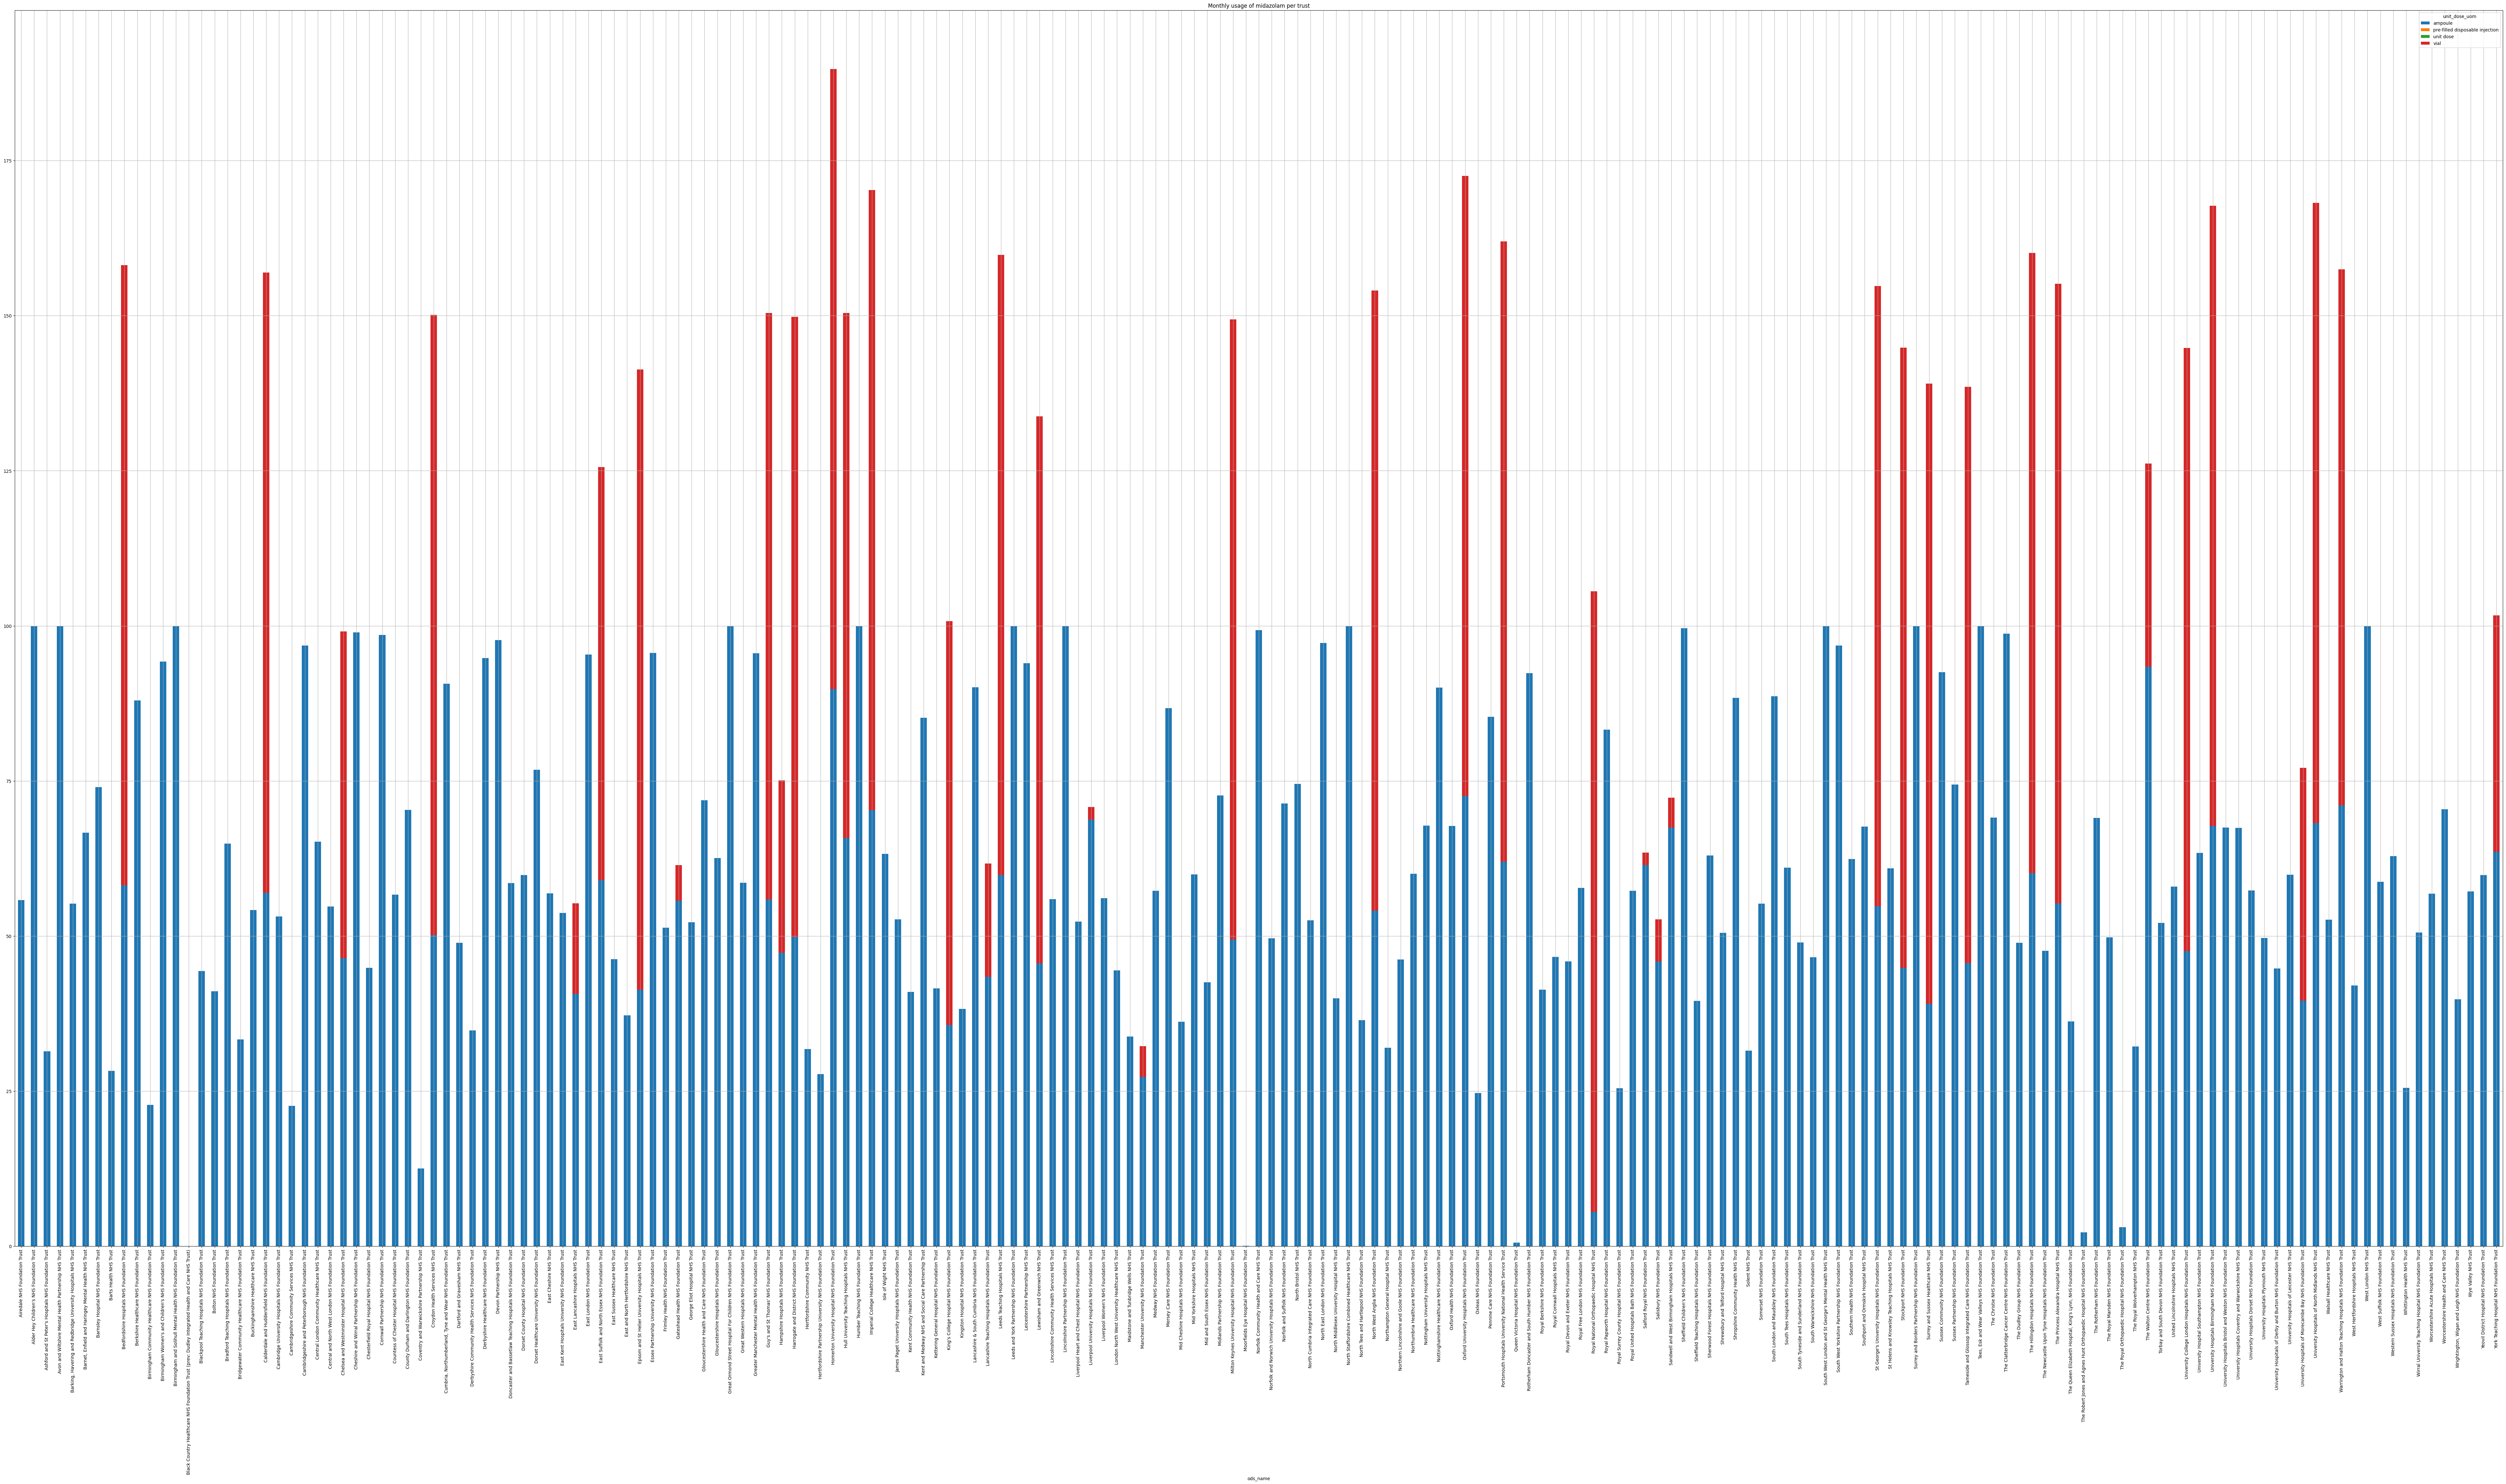

In [86]:
unit_dose_quantity_df.groupby(["ods_name", "unit_dose_uom"])["proportions (%)"].sum().unstack().plot(kind="bar", figsize=(100, 50), stacked=True)

plt.title("Monthly usage of midazolam per trust")
plt.grid()
plt.show()

#### Trusts stocking high dose preparations

In [97]:
print(f"Out of {len(df_midazolam_injectables['ods_name'].unique())} trusts, {len(high_dose_df_injectables['ods_name'].unique())} are stocking high dose preparations.")

Out of 193 trusts, 192 are stocking high dose preparations.


In [99]:
all_trusts = set(df_midazolam_injectables['ods_name'].unique())
trusts_stocking_high_dose = set(high_dose_df_injectables['ods_name'].unique())

print(f"Trust not stocking high dose midazolam injectable: \n {all_trusts.difference(trusts_stocking_high_dose)}")

Trust not stocking high dose midazolam injectable: 
 {'Black Country Healthcare NHS Foundation Trust (prev: Dudley Integrated Health and Care NHS Trust)'}


#### Trusts stocking both low and high dose preparations

In [100]:
trusts_stocking_low_dose = set(low_dose_df["ods_name"].unique())

trust_stocking_both_preparations = trusts_stocking_high_dose.intersection(trusts_stocking_low_dose)

print(f"There are {len(trust_stocking_both_preparations)} trusts stocking both doses of prescriptions.")

There are 179 trusts stocking both doses of prescriptions.


#### Trusts not stocking both preparation doses

In [101]:
trusts_not_stocking_both_preparations = all_trusts.difference(trust_stocking_both_preparations)
print(f"Trusts not stocking both doses: {len(trusts_not_stocking_both_preparations)} and they are \n {list(trusts_not_stocking_both_preparations)}")

Trusts not stocking both doses: 14 and they are 
 ['West London NHS Trust', "Alder Hey Children's NHS Foundation Trust", "Sheffield Children's NHS Foundation Trust", 'Great Ormond Street Hospital For Children NHS Foundation Trust', 'Lincolnshire Partnership NHS Foundation Trust', 'Tees, Esk and Wear Valleys NHS Foundation Trust', 'North Staffordshire Combined Healthcare NHS Trust', 'Avon and Wiltshire Mental Health Partnership NHS Trust', 'Black Country Healthcare NHS Foundation Trust (prev: Dudley Integrated Health and Care NHS Trust)', 'Surrey and Borders Partnership NHS Foundation Trust', "South West London and St George's Mental Health NHS Trust", 'Humber Teaching NHS Foundation Trust', 'Leeds and York Partnership NHS Foundation Trust', 'Birmingham and Solihull Mental Health NHS Foundation Trust']


### Proportion of high doses stocked per trust & region
To achieve this:
1. create a dataframe of trusts/regions and the total sum of high doses they've stocked.
2. create a dataframe of trusts/regions and the total sum of all doses stocked.
3. merge both dataframes into a new one.
4. create a new column on the new dataframe which simply does a proportion calculation and returns the answer as a percentage.
5. optionally, sort the dataframe in descending order to know the ranking and variation between trusts.

In [102]:
def proportions(df, df2, col: str):
    """
    Calculate the percentage of high-dose midazolam stocked

    Arguments:
        - df1: dataframe of high_dose midazolam
        - df2: overall dataframe (comprising high and low dose)
        - col: to toggle between calculating per region or per trust
    """
    # calculate the total high strength doses stocked per relevant column 
    sum_high_doses = df.groupby(col)["num_of_doses"].sum().reset_index()
    sum_high_doses.columns = [col, "high_dose_sum"]

    # calculate the total doses stocked per relevant column
    sum_all_doses = df2.groupby(col)["num_of_doses"].sum().reset_index()
    sum_all_doses.columns = [col, "all_dose_sum"]

    high_doses_proportions = sum_all_doses.merge(sum_high_doses, on=col) # merging both dataframes 
    high_doses_proportions.columns = [col, "all_dose_sum", "high_dose_sum"]

    # computing proportion of high dose midazolam stocked, as a percentage
    high_doses_proportions["proportion_high_dose_stocked (%)"] = round(
        (high_doses_proportions["high_dose_sum"] / high_doses_proportions["all_dose_sum"]) * 100, 1)

    return high_doses_proportions

In [103]:
trust_high_dose_proportions = high_dose_df_injectables.pipe(proportions, df_midazolam, "ods_name")
trust_high_dose_proportions.head()

,ods_name,all_dose_sum,high_dose_sum,proportion_high_dose_stocked (%)
0,Airedale NHS Foundation Trust,173183.0,96165.0,55.5
1,Alder Hey Children's NHS Foundation Trust,119470.0,113946.0,95.4
2,Ashford and St Peter's Hospitals NHS Foundatio...,292323.0,90927.0,31.1
3,Avon and Wiltshire Mental Health Partnership N...,3959.0,3840.0,97.0
4,"Barking, Havering and Redbridge University Hos...",527087.0,272694.0,51.7


<Figure size 2000x2000 with 0 Axes>

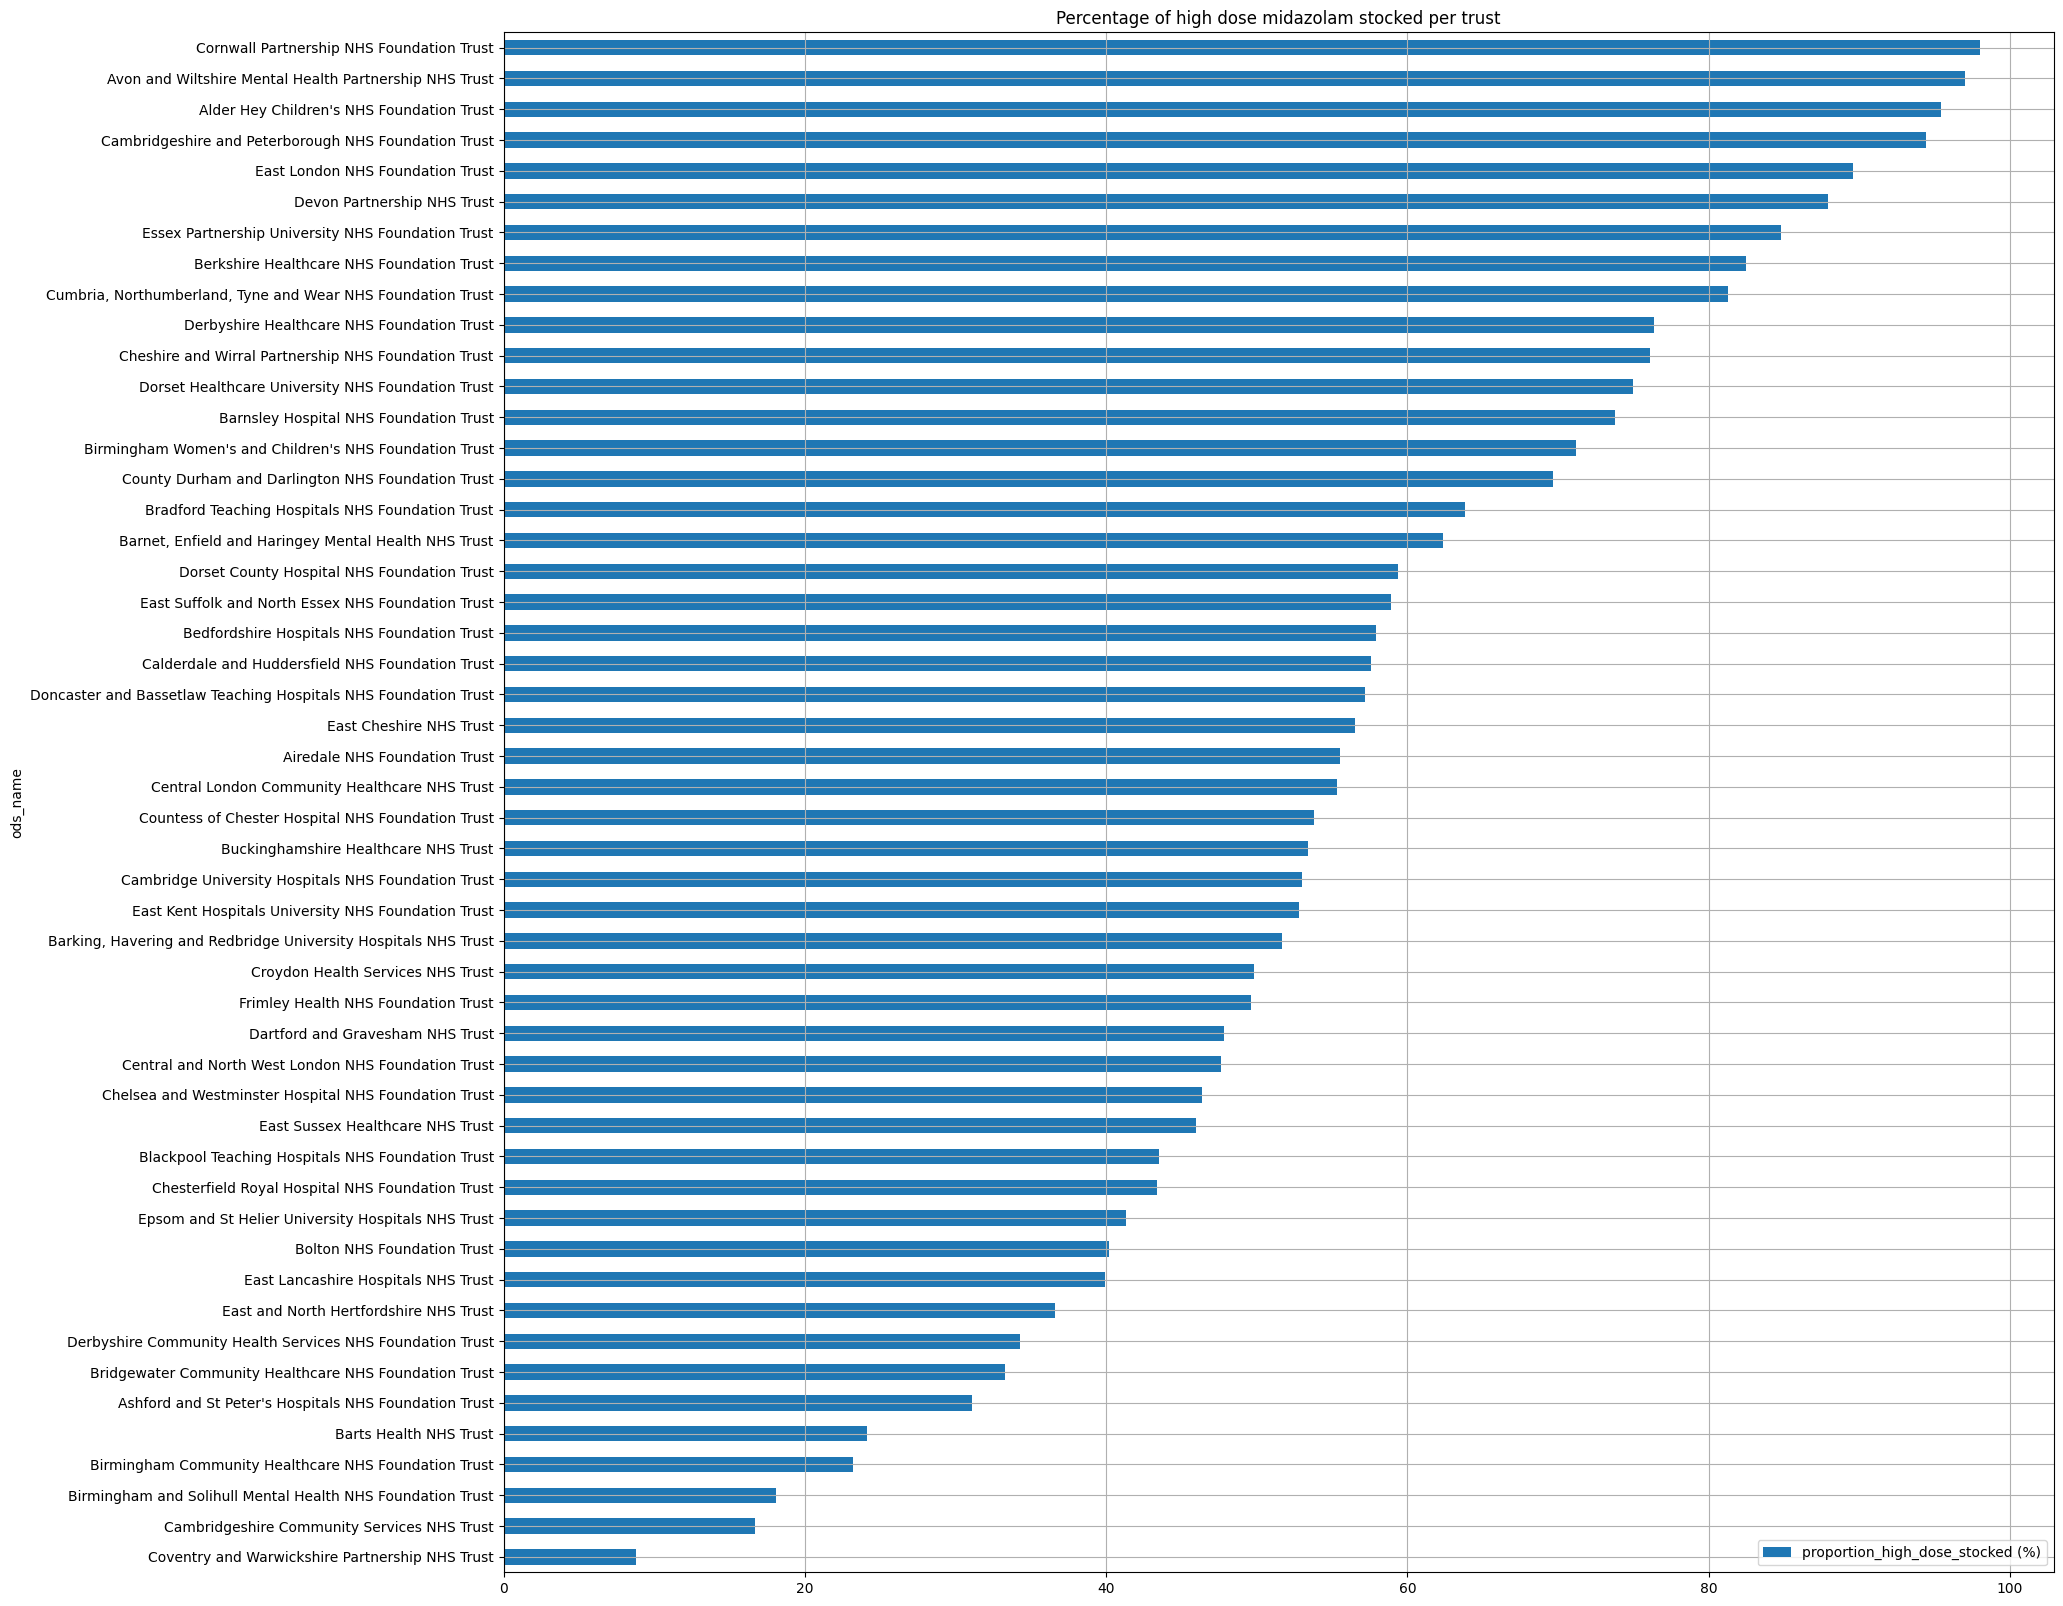

In [104]:
figure = plt.figure(figsize=(20, 20))
trust_high_dose_proportions[:50].sort_values(by="proportion_high_dose_stocked (%)", ascending=True).plot(x="ods_name", y="proportion_high_dose_stocked (%)", kind="barh", figsize=(20, 20))
plt.grid()
plt.title("Percentage of high dose midazolam stocked per trust")
plt.show()

#### rank of trusts based on percentage of high dose midazolam stocked

In [105]:
trust_high_dose_proportions.sort_values(by="proportion_high_dose_stocked (%)", ascending=False).head()

,ods_name,all_dose_sum,high_dose_sum,proportion_high_dose_stocked (%)
95,Norfolk Community Health and Care NHS Trust,77295.0,76551.0,99.0
153,The Clatterbridge Cancer Centre NHS Foundation...,39701.0,39057.0,98.4
27,Cornwall Partnership NHS Foundation Trust,16541.0,16215.0,98.0
3,Avon and Wiltshire Mental Health Partnership N...,3959.0,3840.0,97.0
1,Alder Hey Children's NHS Foundation Trust,119470.0,113946.0,95.4


### Proportion of high dose midazolm stocked per region

In [106]:
region_high_dose_proportions = high_dose_df_injectables.pipe(proportions, df_midazolam, "region")
region_high_dose_proportions.head()

,region,all_dose_sum,high_dose_sum,proportion_high_dose_stocked (%)
0,East Midlands,4314440.995,2363824.995,54.8
1,East of England,5790317.500,3047133.000,52.6
2,London,9847432.760,4754869.800,48.3
3,North East,3355651.500,1790745.000,53.4
4,North West,6727206.440,3411550.440,50.7


<Figure size 1500x1500 with 0 Axes>

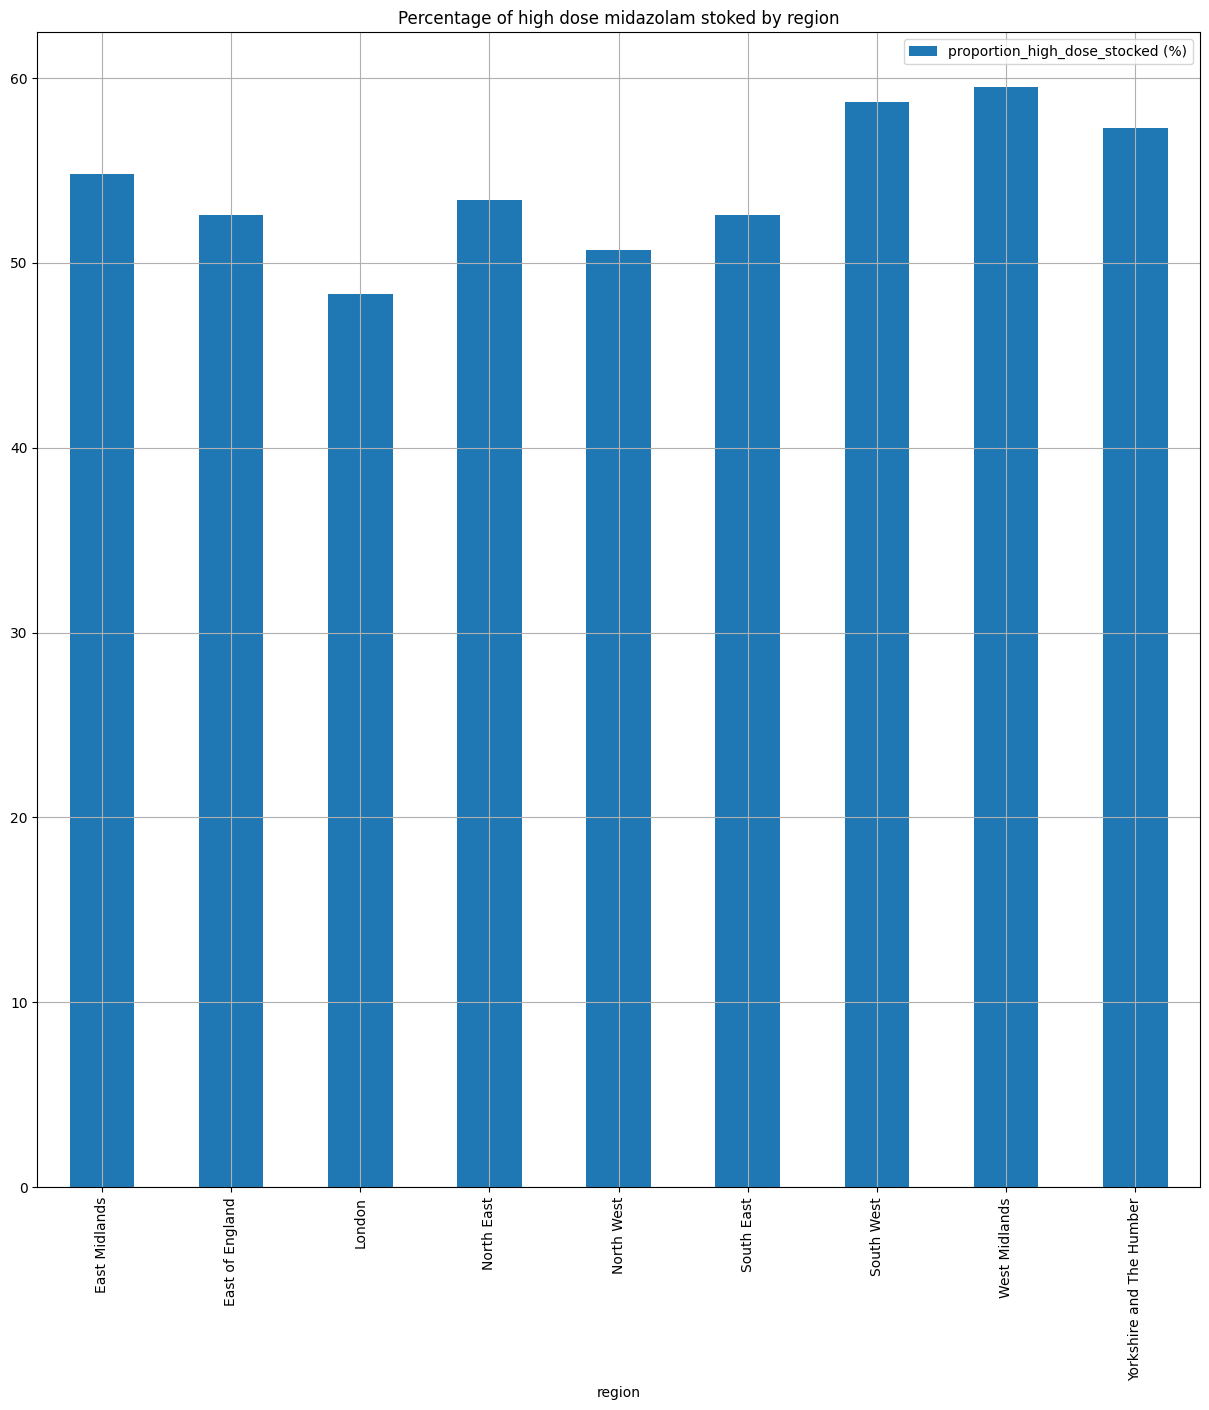

In [107]:
figure = plt.figure(figsize=(15, 15))
region_high_dose_proportions[:50].plot(x="region", y="proportion_high_dose_stocked (%)", kind="bar", figsize=(15, 15))
plt.grid()
plt.title("Percentage of high dose midazolam stoked by region")
plt.show()

Next steps:
1. yearly trend in higher proportion of high dose stocking per region.


## Working on Flumazenil

In [108]:
flumazenil_query = f"SELECT * FROM scmd.scmd_full WHERE vmp_name LIKE '%Flumazenil%'"

df_flumazenil = bq.cached_read(sql=flumazenil_query, csv_path="../data/scmd_flumazenil.csv", use_cache=True)

In [109]:
df_flumazenil.head()

,year_month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,df_ind,udfs,udfs_uom,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description
0,2023-06-01,420.0,150.0,ML,RR7,Gateshead Health NHS Foundation Trust,North East,36067711000001104,775985005,Flumazenil,Discrete,5.0,ml,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
1,2023-06-01,308.0,110.0,ML,RCU,Sheffield Children's NHS Foundation Trust,Yorkshire and The Humber,36067711000001104,775985005,Flumazenil,Discrete,5.0,ml,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
2,2023-06-01,140.0,50.0,ML,RY3,Norfolk Community Health and Care NHS Trust,East of England,36067711000001104,775985005,Flumazenil,Discrete,5.0,ml,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
3,2023-06-01,140.0,50.0,ML,RBS,Alder Hey Children's NHS Foundation Trust,North West,36067711000001104,775985005,Flumazenil,Discrete,5.0,ml,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
4,2023-06-01,140.0,50.0,ML,RXE,Rotherham Doncaster and South Humber NHS Found...,Yorkshire and The Humber,36067711000001104,775985005,Flumazenil,Discrete,5.0,ml,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous


In [110]:
df_flumazenil.shape

(9061, 23)

### do the trusts that stock high-dose midazolam also stock flumazenil?

In [111]:
trusts_stocking_high_dose_midazolam = set(high_dose_df_injectables['ods_name'].unique())
trusts_stocking_flumazenil = set(df_flumazenil["ods_name"].unique())

In [112]:
trusts_stocking_high_dose_midazolam.difference(trusts_stocking_flumazenil)

{'Bridgewater Community Healthcare NHS Foundation Trust',
 "South West London and St George's Mental Health NHS Trust"}

In [ ]:
df_flumazenil["ing"].value_counts()

## Other analyses of Midazolam

### number of times each dose is stocked

In [114]:
df_midazolam_injectables.head(2)

,year_month,year,month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,df_ind,udfs,udfs_uom,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description,num_of_doses,dose_in_mg,dose_prescribed_in_mg_per_ml
79,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Intramuscular,4.0,200.0,1.0
80,2019-04-01,2019,4,48.0,200.0,ML,REF,Royal Cornwall Hospitals NHS Trust,South West,4508111000001108,776785007,Midazolam,Discrete,50.0,ml,vial,Solution for infusion,Midazolam 50mg/50ml solution for infusion vials,84213009,1.0,1.0,mg,ml,Midazolam hydrochloride,Rectal,4.0,200.0,1.0


There are 5 doses of midazolam stocked


/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/3604045876.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


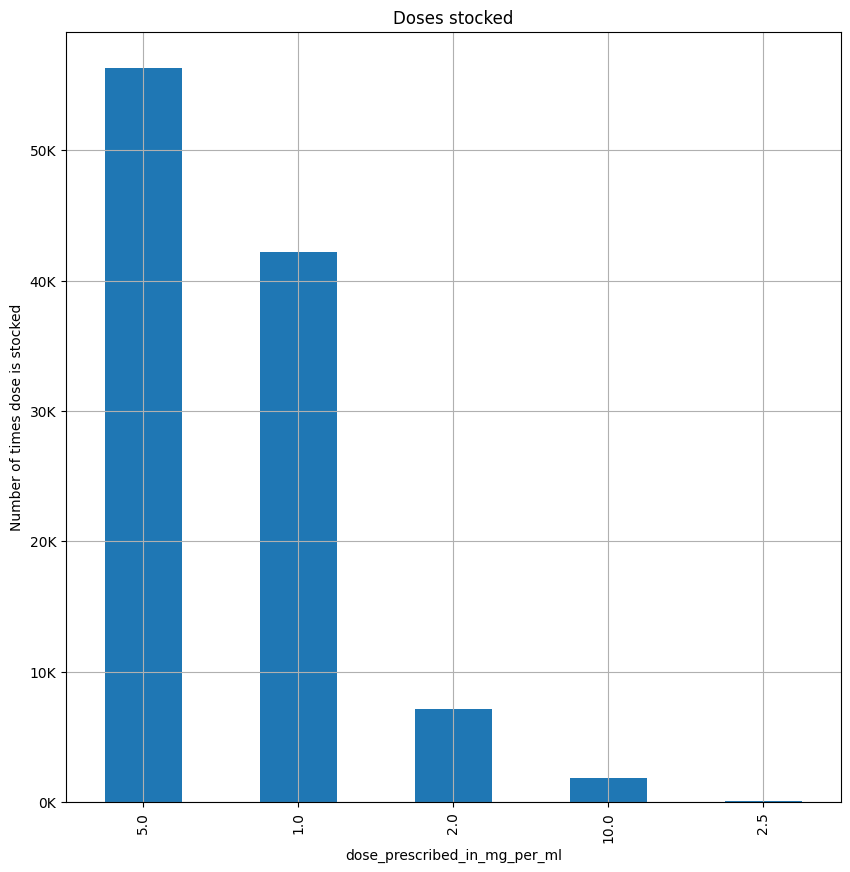

In [116]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Number of times dose is stocked")

print(f"There are {len(df_midazolam_injectables['dose_prescribed_in_mg_per_ml'].unique())} doses of midazolam stocked")
df_midazolam['dose_prescribed_in_mg_per_ml'].value_counts().plot(kind='bar', rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Doses stocked")
plt.grid()
plt.show()

### yearly trend in low dose prescription

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/4158659073.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


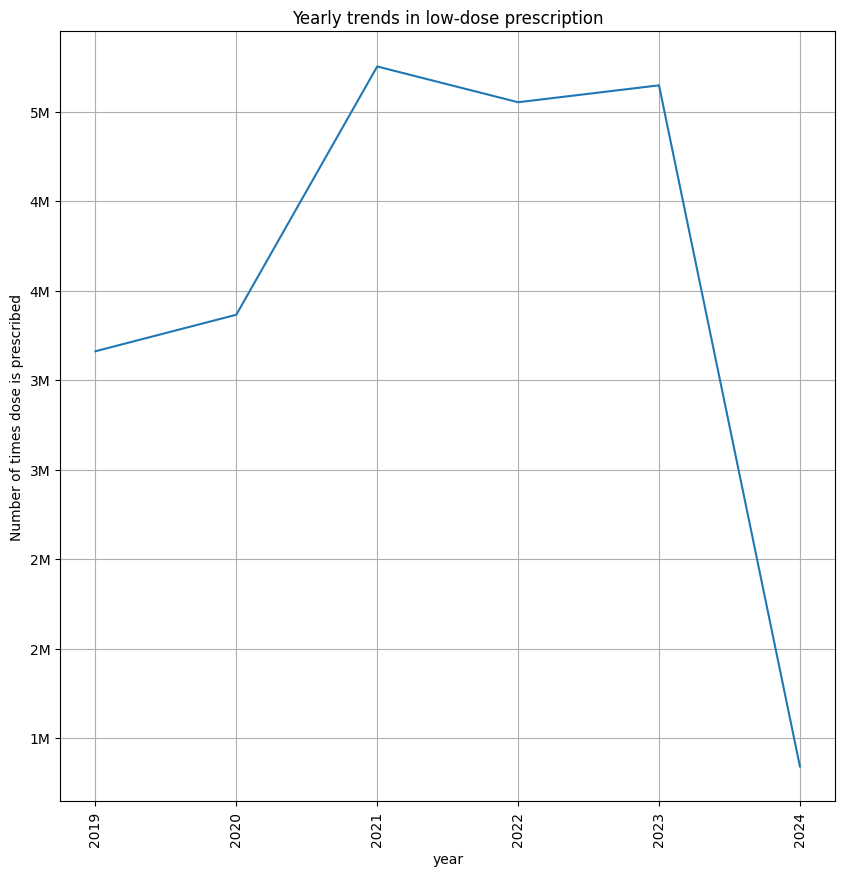

In [118]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Number of times dose is prescribed")

low_dose_df.groupby('year')['num_of_doses'].sum().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Yearly trends in low-dose prescription")
plt.grid()
plt.show()

### yearly trends in high dose prescription

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/4160853837.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


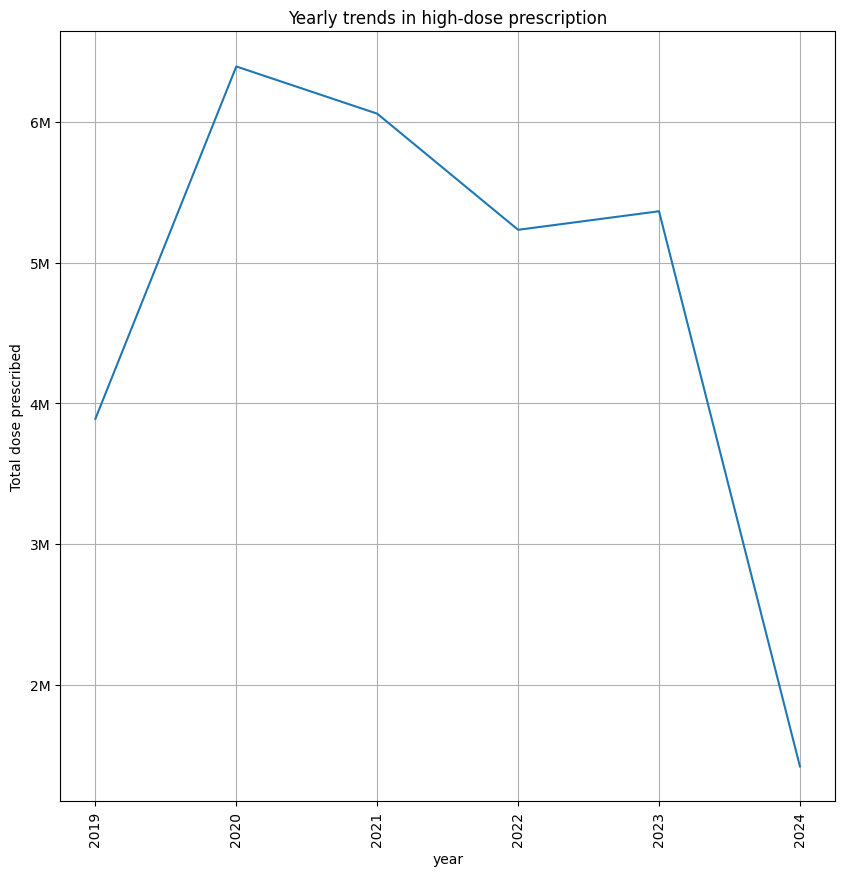

In [121]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Total dose prescribed")

high_dose_df_injectables.groupby('year')['num_of_doses'].sum().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Yearly trends in high-dose prescription")
plt.grid()
plt.show()

### dosage forms of Midazolam prescribed 

In [122]:
print(f"There are {len(df_midazolam_injectables.dform_form.unique())} dosage forms of Midazolam stocked and they are: \n {df_midazolam_injectables.dform_form.unique()}")

There are 4 dosage forms of Midazolam stocked and they are: 
 ['Solution for infusion' 'Solution for injection' 'Oromucosal solution'
 'Oral solution']


### quantity of dosage forms prescribed

In [123]:
dfd = df_midazolam_injectables.drop_duplicates(subset=["vmp_code", "dform_form"])
dfd["dform_form"].value_counts()

dform_form
Oromucosal solution       14
Solution for injection     7
Solution for infusion      2
Oral solution              1
Name: count, dtype: int64

There are 4 dosage forms of midazolam


/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/3672483459.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


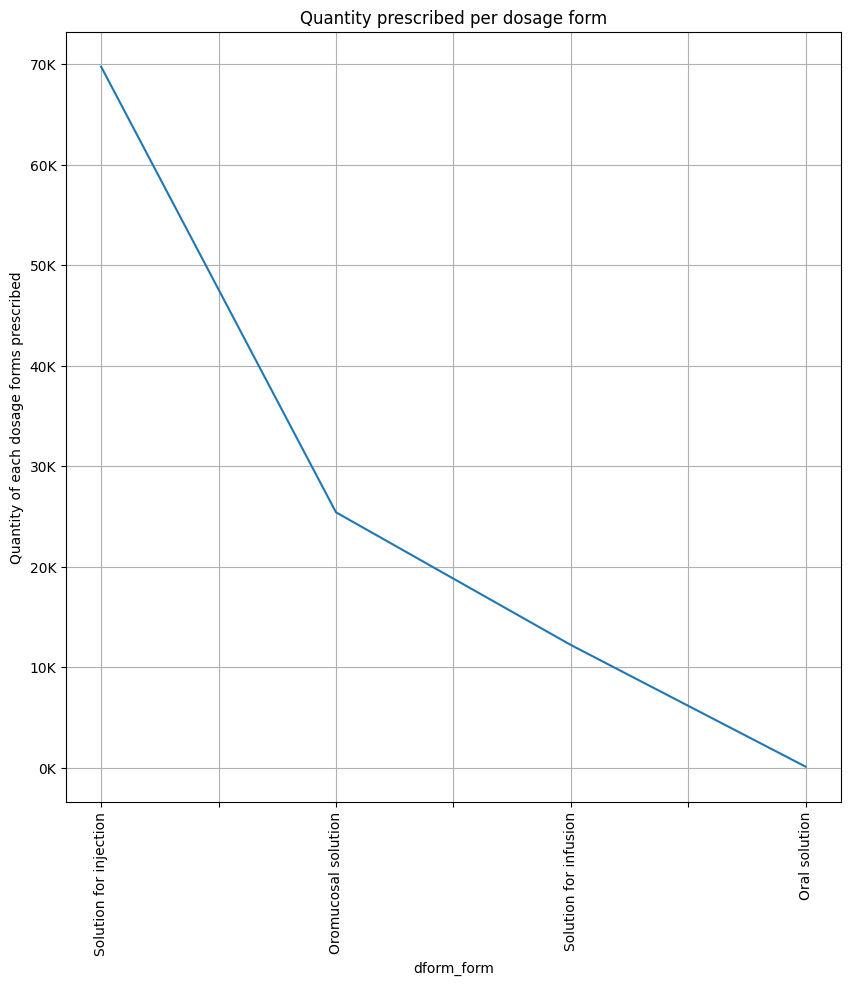

In [124]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Quantity of each dosage forms prescribed")

print(f"There are {len(df_midazolam_injectables['dform_form'].unique())} dosage forms of midazolam")
df_midazolam["dform_form"].value_counts().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Quantity prescribed per dosage form")
plt.grid()
plt.show()

### route of administration

There are 5 dosage forms of midazolam


/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/3176421036.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


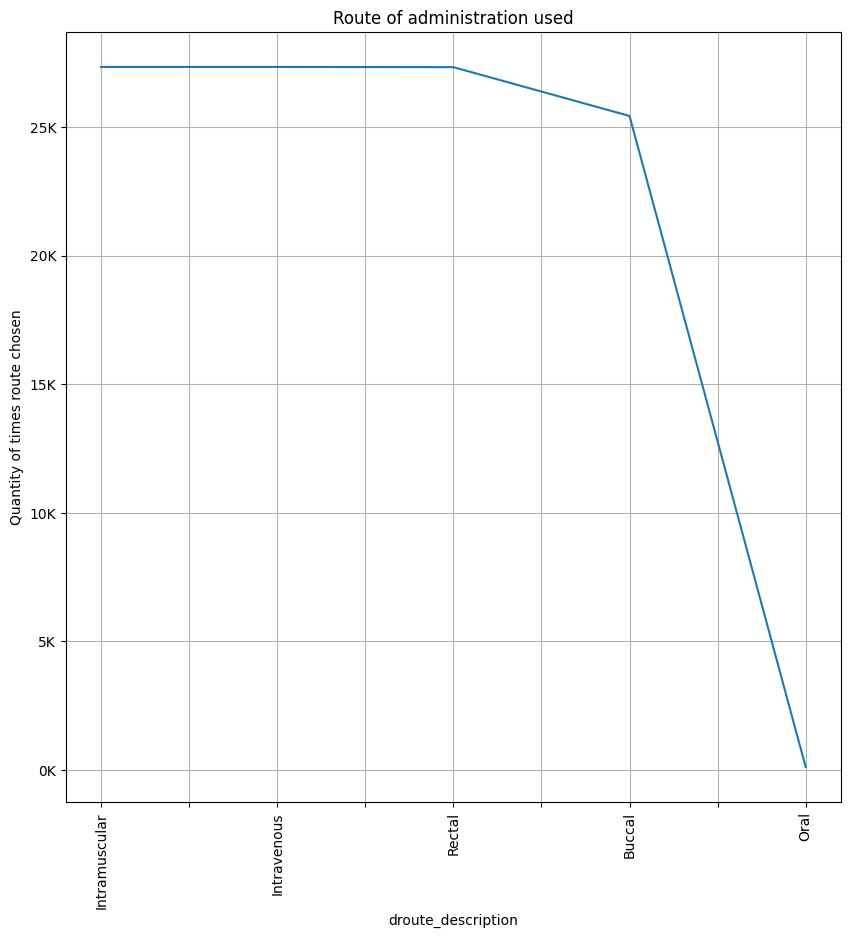

In [125]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Quantity of times route chosen")

print(f"There are {len(df_midazolam_injectables['droute_description'].unique())} dosage forms of midazolam")
df_midazolam["droute_description"].value_counts().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Route of administration used")
plt.grid()
plt.show()

### companies prescribing midazolam and lidocaine combination

In [ ]:
plt.figure(figsize=(20,15))

midazolam_lidocaine_df = df_midazolam[df_midazolam["vtm_name"] == "Midazolam + Lidocaine"]

midazolam_lidocaine_df.groupby(["ods_name", "vtm_name"])["quantity"].sum().sort_values(ascending=False).plot(kind="barh")

plt.gca().invert_yaxis()
plt.title("Quantity of Midazolam + Lidocaine combination stocked per trust")
plt.grid()
plt.show()

### cost of midazolam per region

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/696489490.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


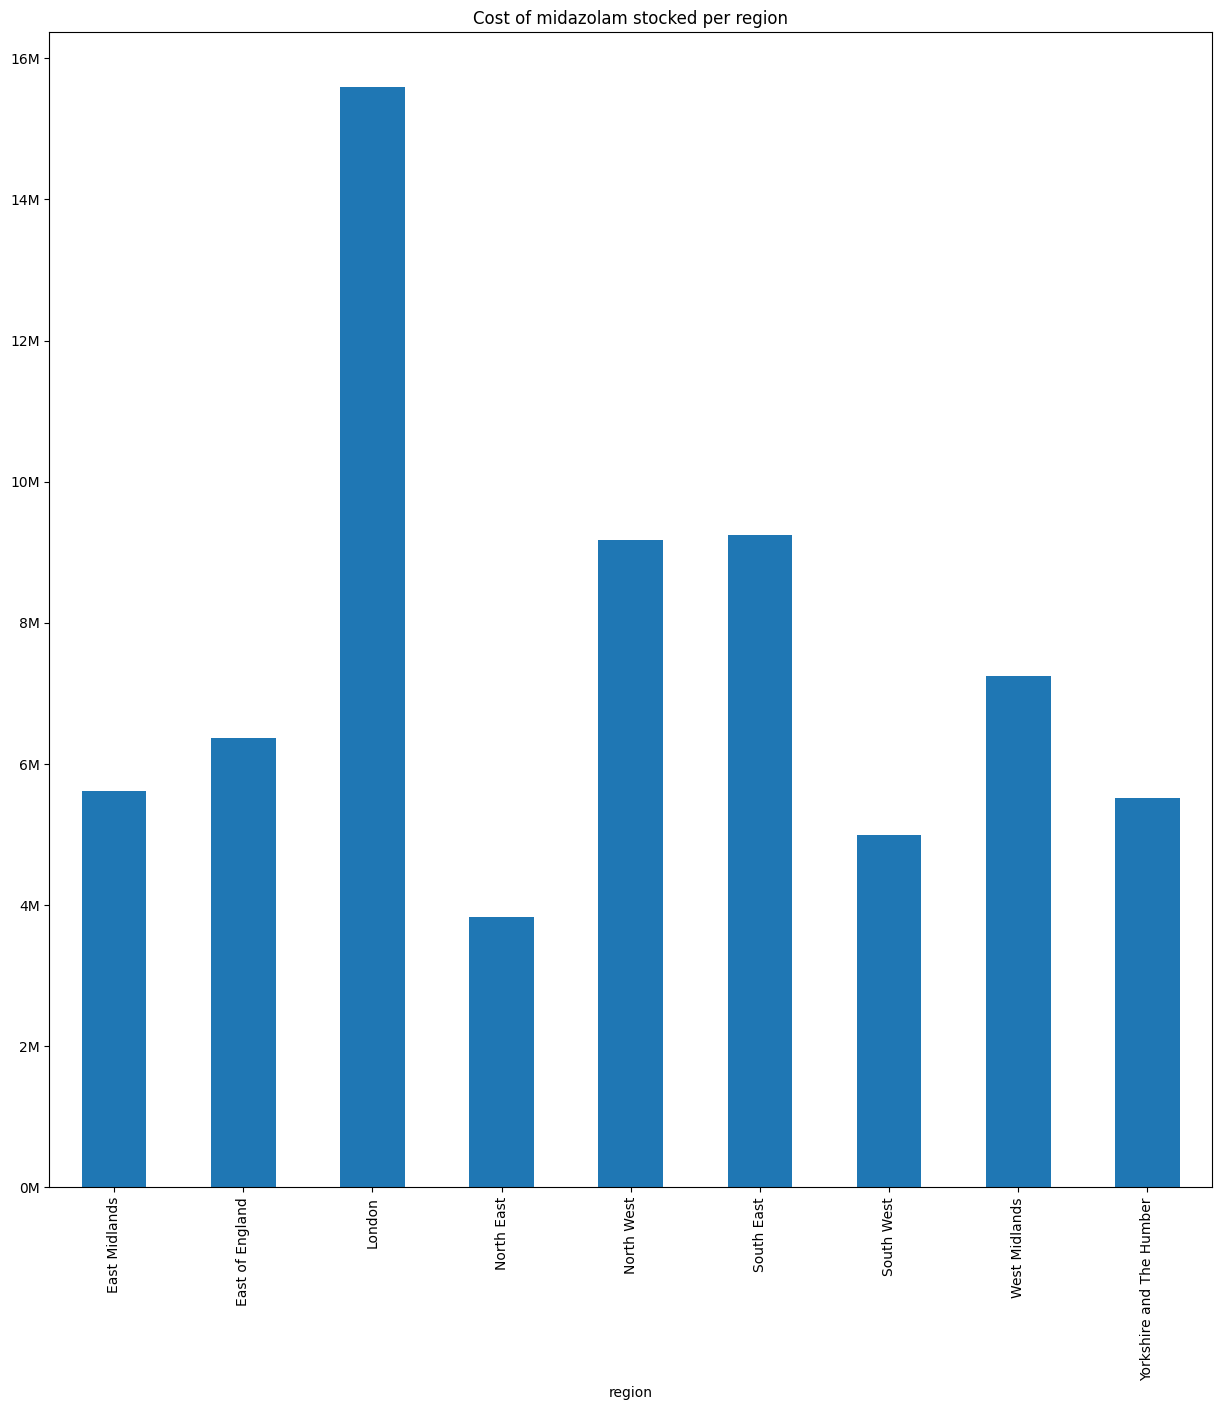

In [129]:
plt.figure(figsize=(15,15))

df_midazolam_injectables.groupby("region")["indicative_cost"].sum().plot(kind='bar')
current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)
plt.title("Cost of midazolam stocked per region")
# plt.grid()
plt.show()

### quantity of midazolam per region

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/496079725.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


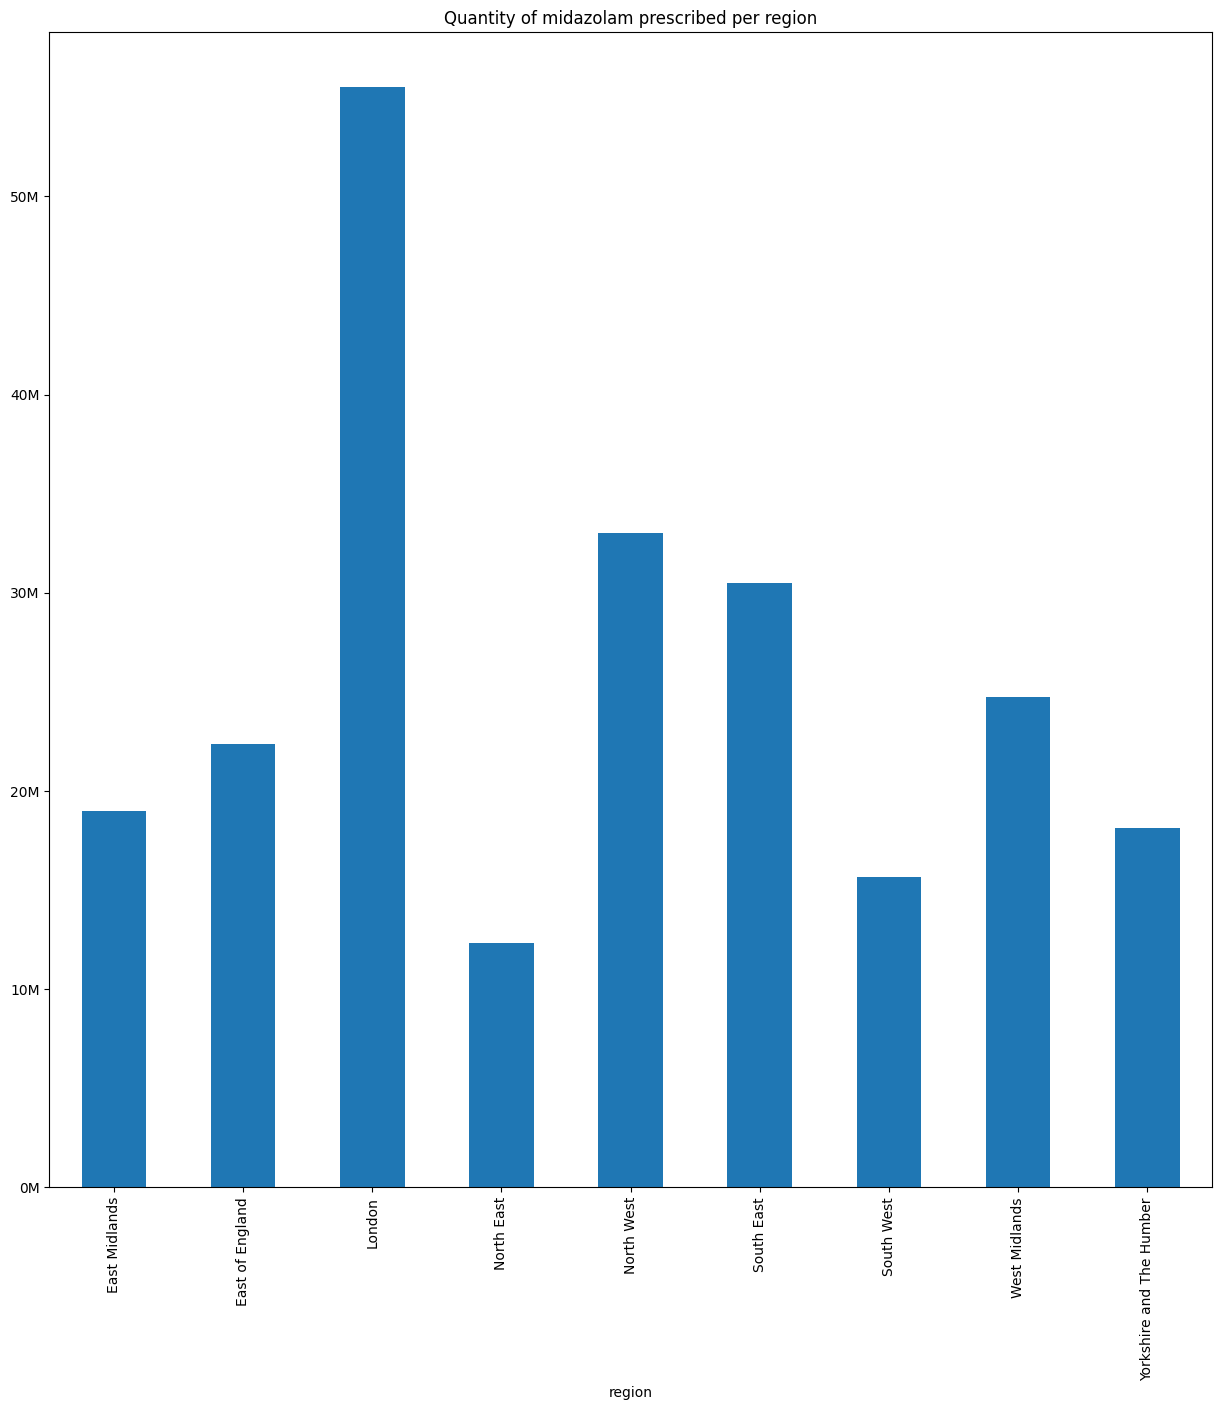

In [127]:
plt.figure(figsize=(15,15))

df_midazolam_injectables.groupby("region")["quantity"].sum().plot(kind='bar')
current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)
plt.title("Quantity of midazolam stocked per region")
# plt.grid()
plt.show()

### cost of midazolam prescribed per trust

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/2236011125.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(formatted_labels)


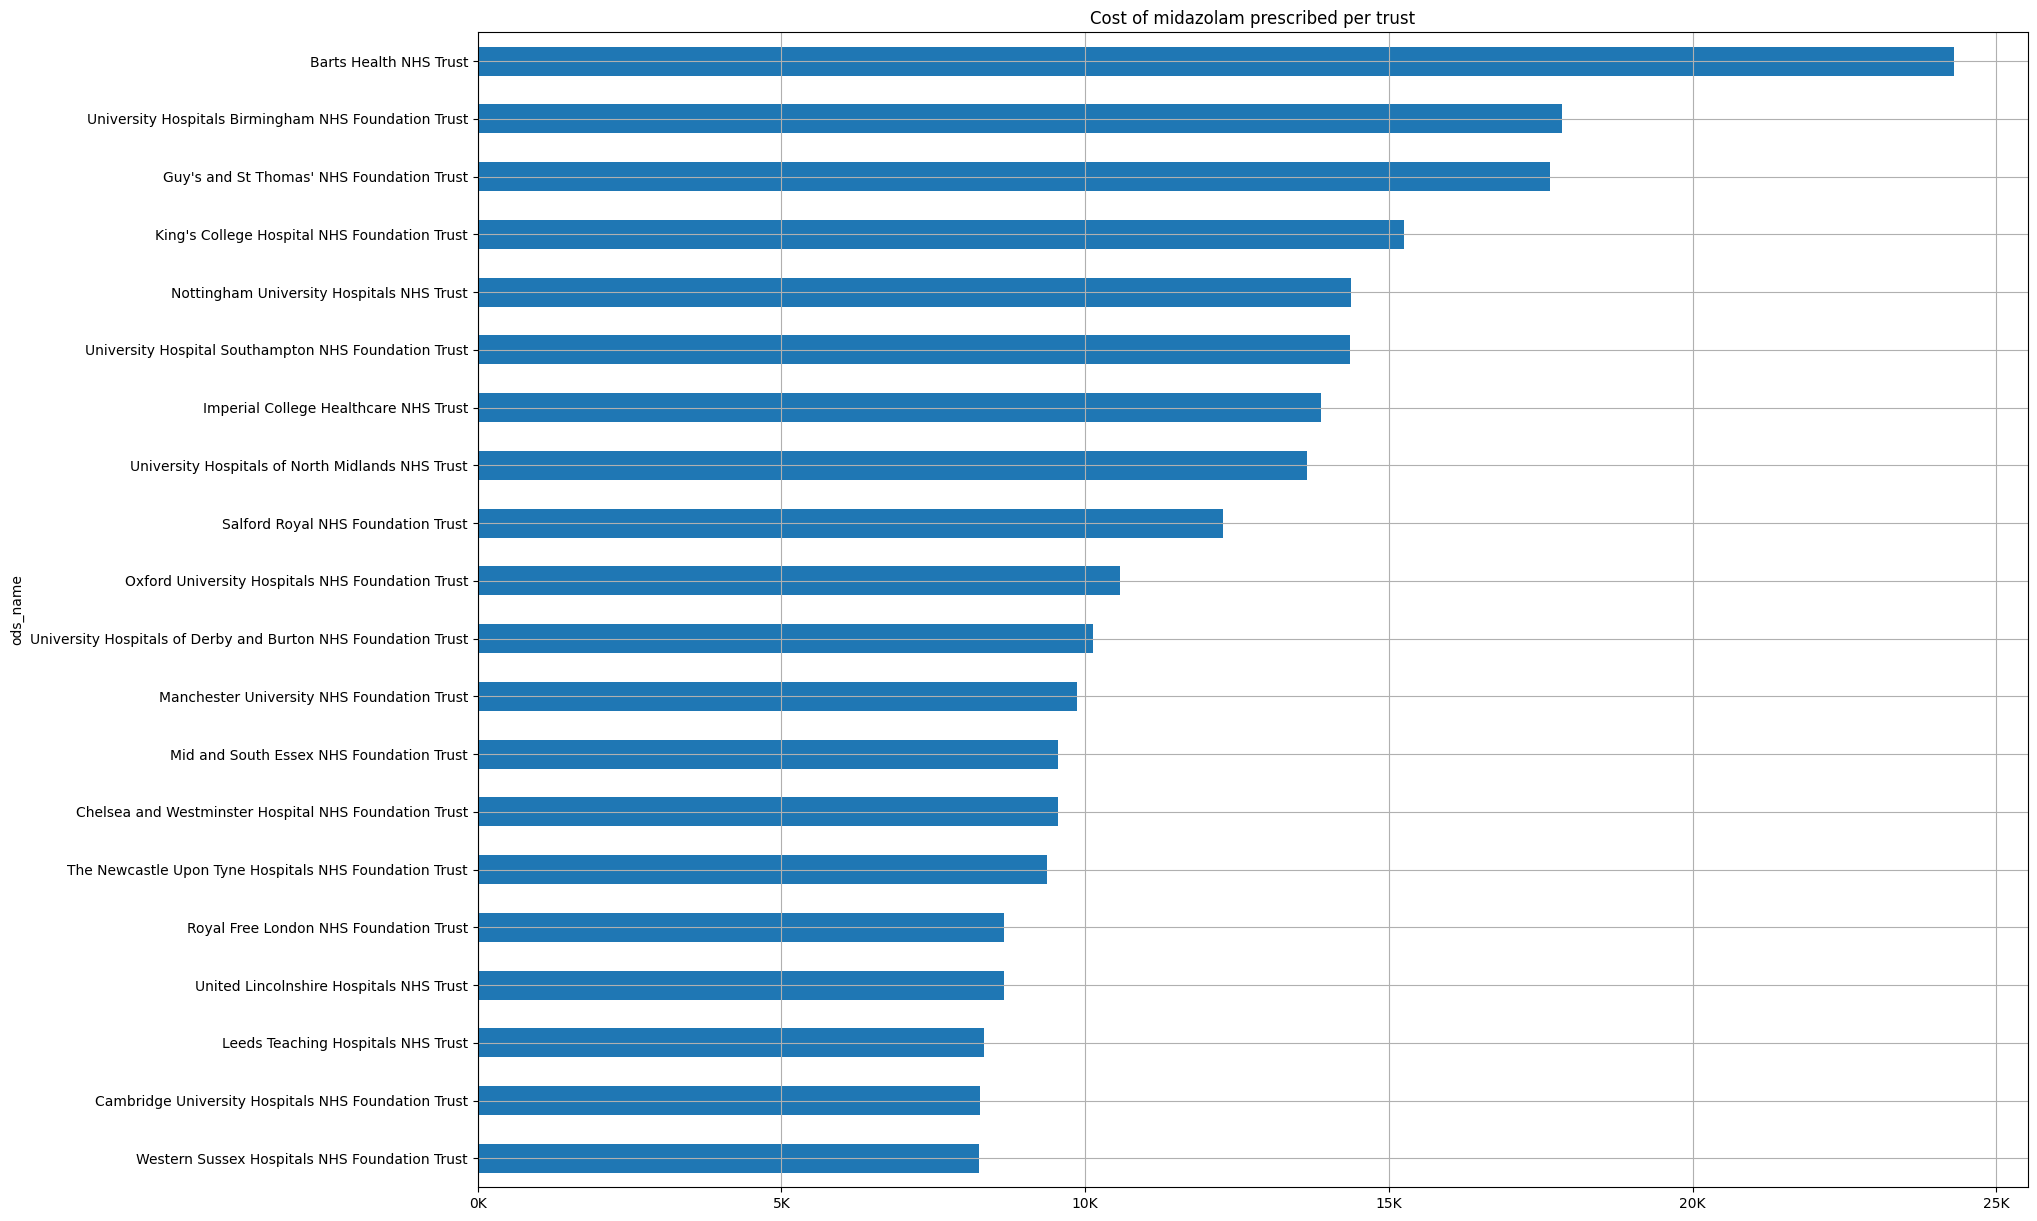

In [128]:
plt.figure(figsize=(20,15))

df_midazolam_injectables.groupby("ods_name")["indicative_cost"].sum().sort_values(ascending=False)[:20].plot(kind="barh")

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/100000)}K' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)
plt.gca().invert_yaxis()
plt.title("Cost of midazolam stocked per trust")
plt.grid()
plt.show()

### quantity of midazolam prescribed per trust

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/251834949.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(formatted_labels)


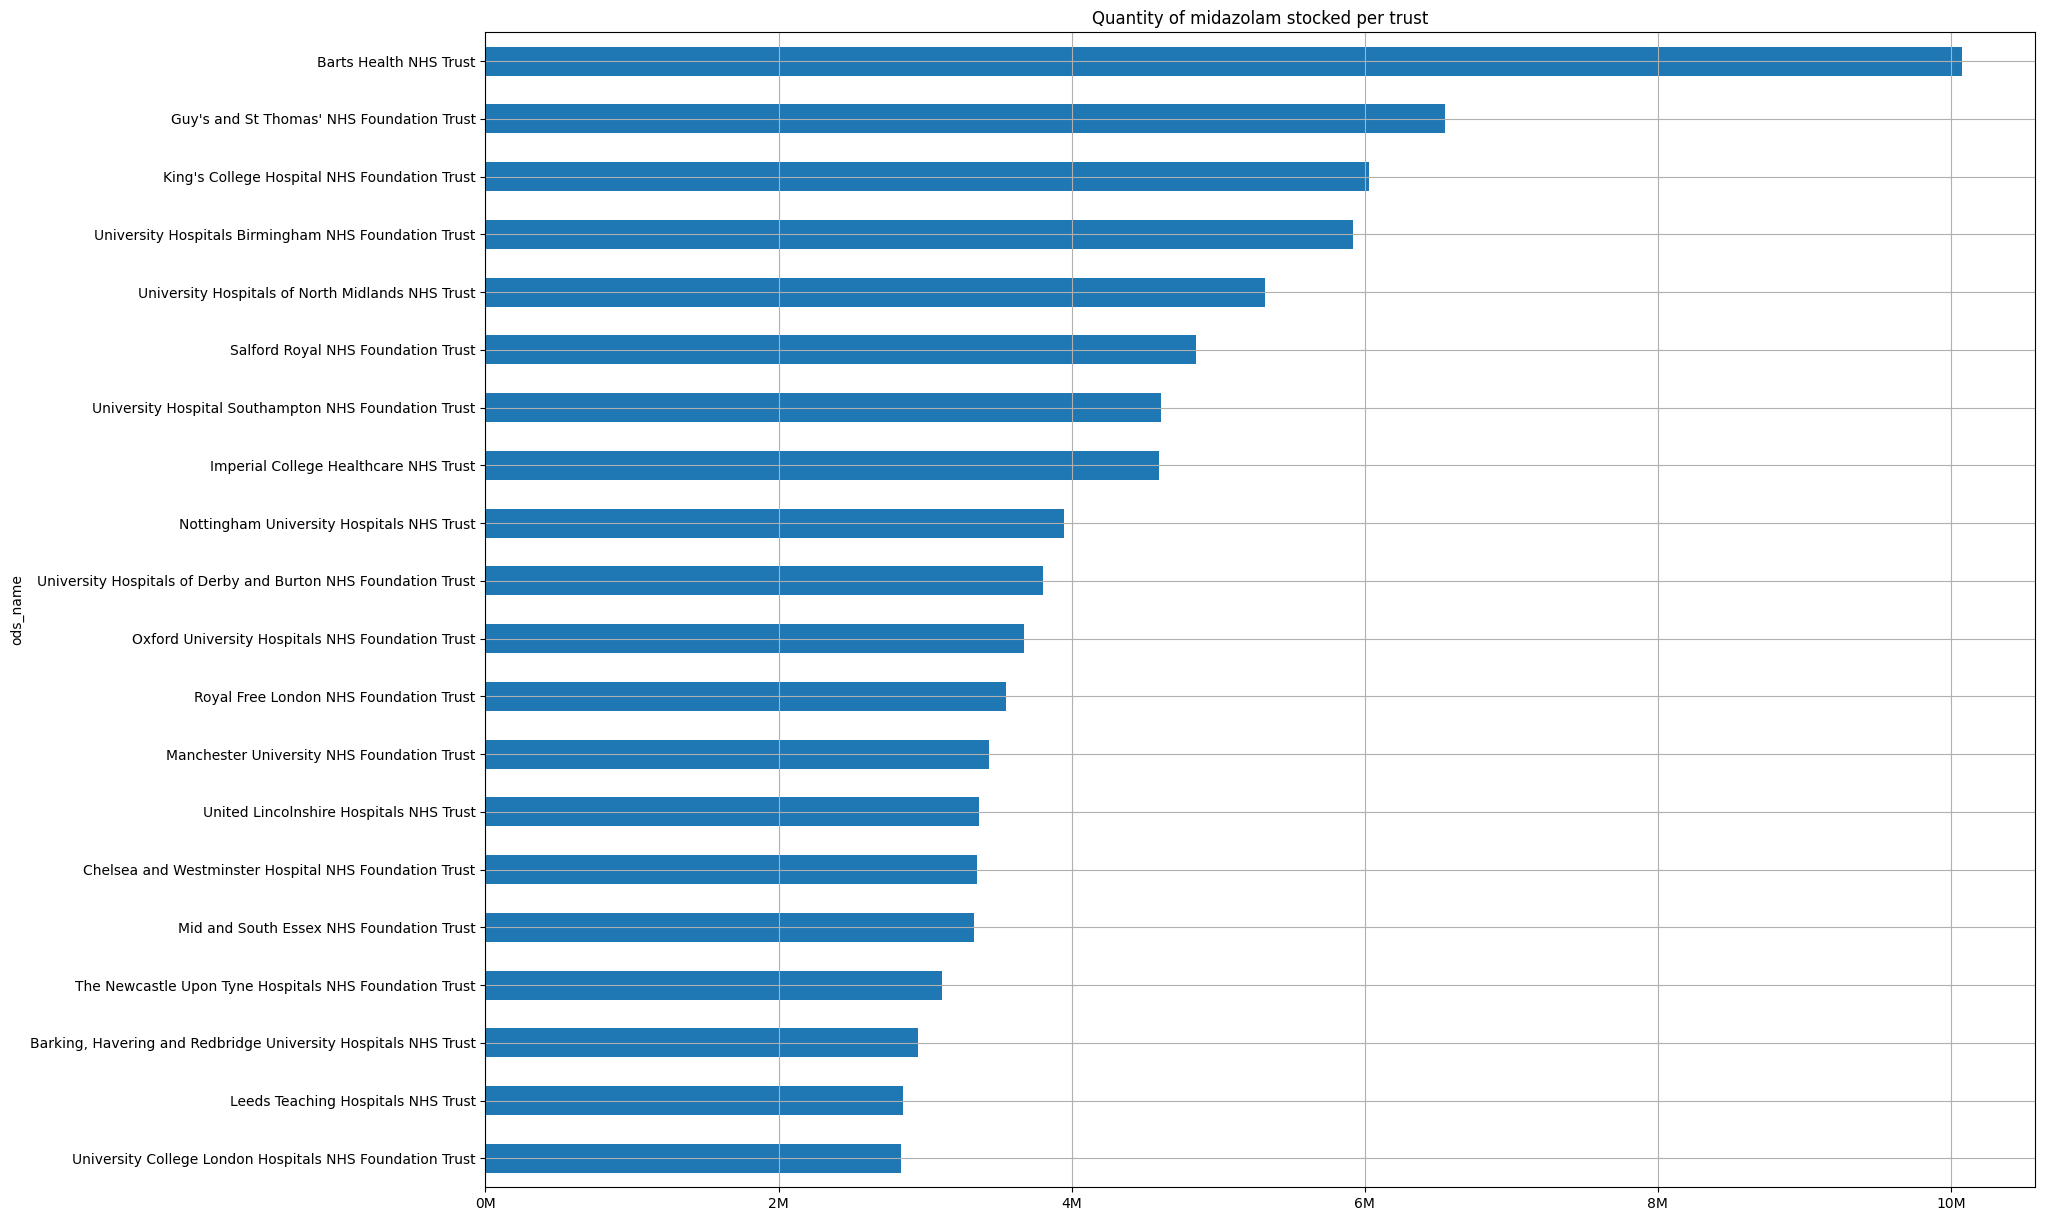

In [130]:
plt.figure(figsize=(20,15))

df_midazolam.groupby("ods_name")["quantity"].sum().sort_values(ascending=False)[:20].plot(kind="barh")

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)
plt.gca().invert_yaxis()
plt.title("Quantity of midazolam stocked per trust")
plt.grid()
plt.show()

In [132]:
quantity_per_trust = df_midazolam.groupby("ods_name")["quantity"].sum().sort_values(ascending=False).reset_index()

quantity_per_trust.columns = ["Trust", "Quantity Stocked"]

quantity_per_trust.tail()

,Trust,Quantity Stocked
188,North Staffordshire Combined Healthcare NHS Trust,701.0
189,Surrey and Borders Partnership NHS Foundation ...,298.0
190,Bridgewater Community Healthcare NHS Foundatio...,180.0
191,South West London and St George's Mental Healt...,142.0
192,Black Country Healthcare NHS Foundation Trust ...,8.0


cost of midazolam per formulation

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/389911078.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(formatted_labels)


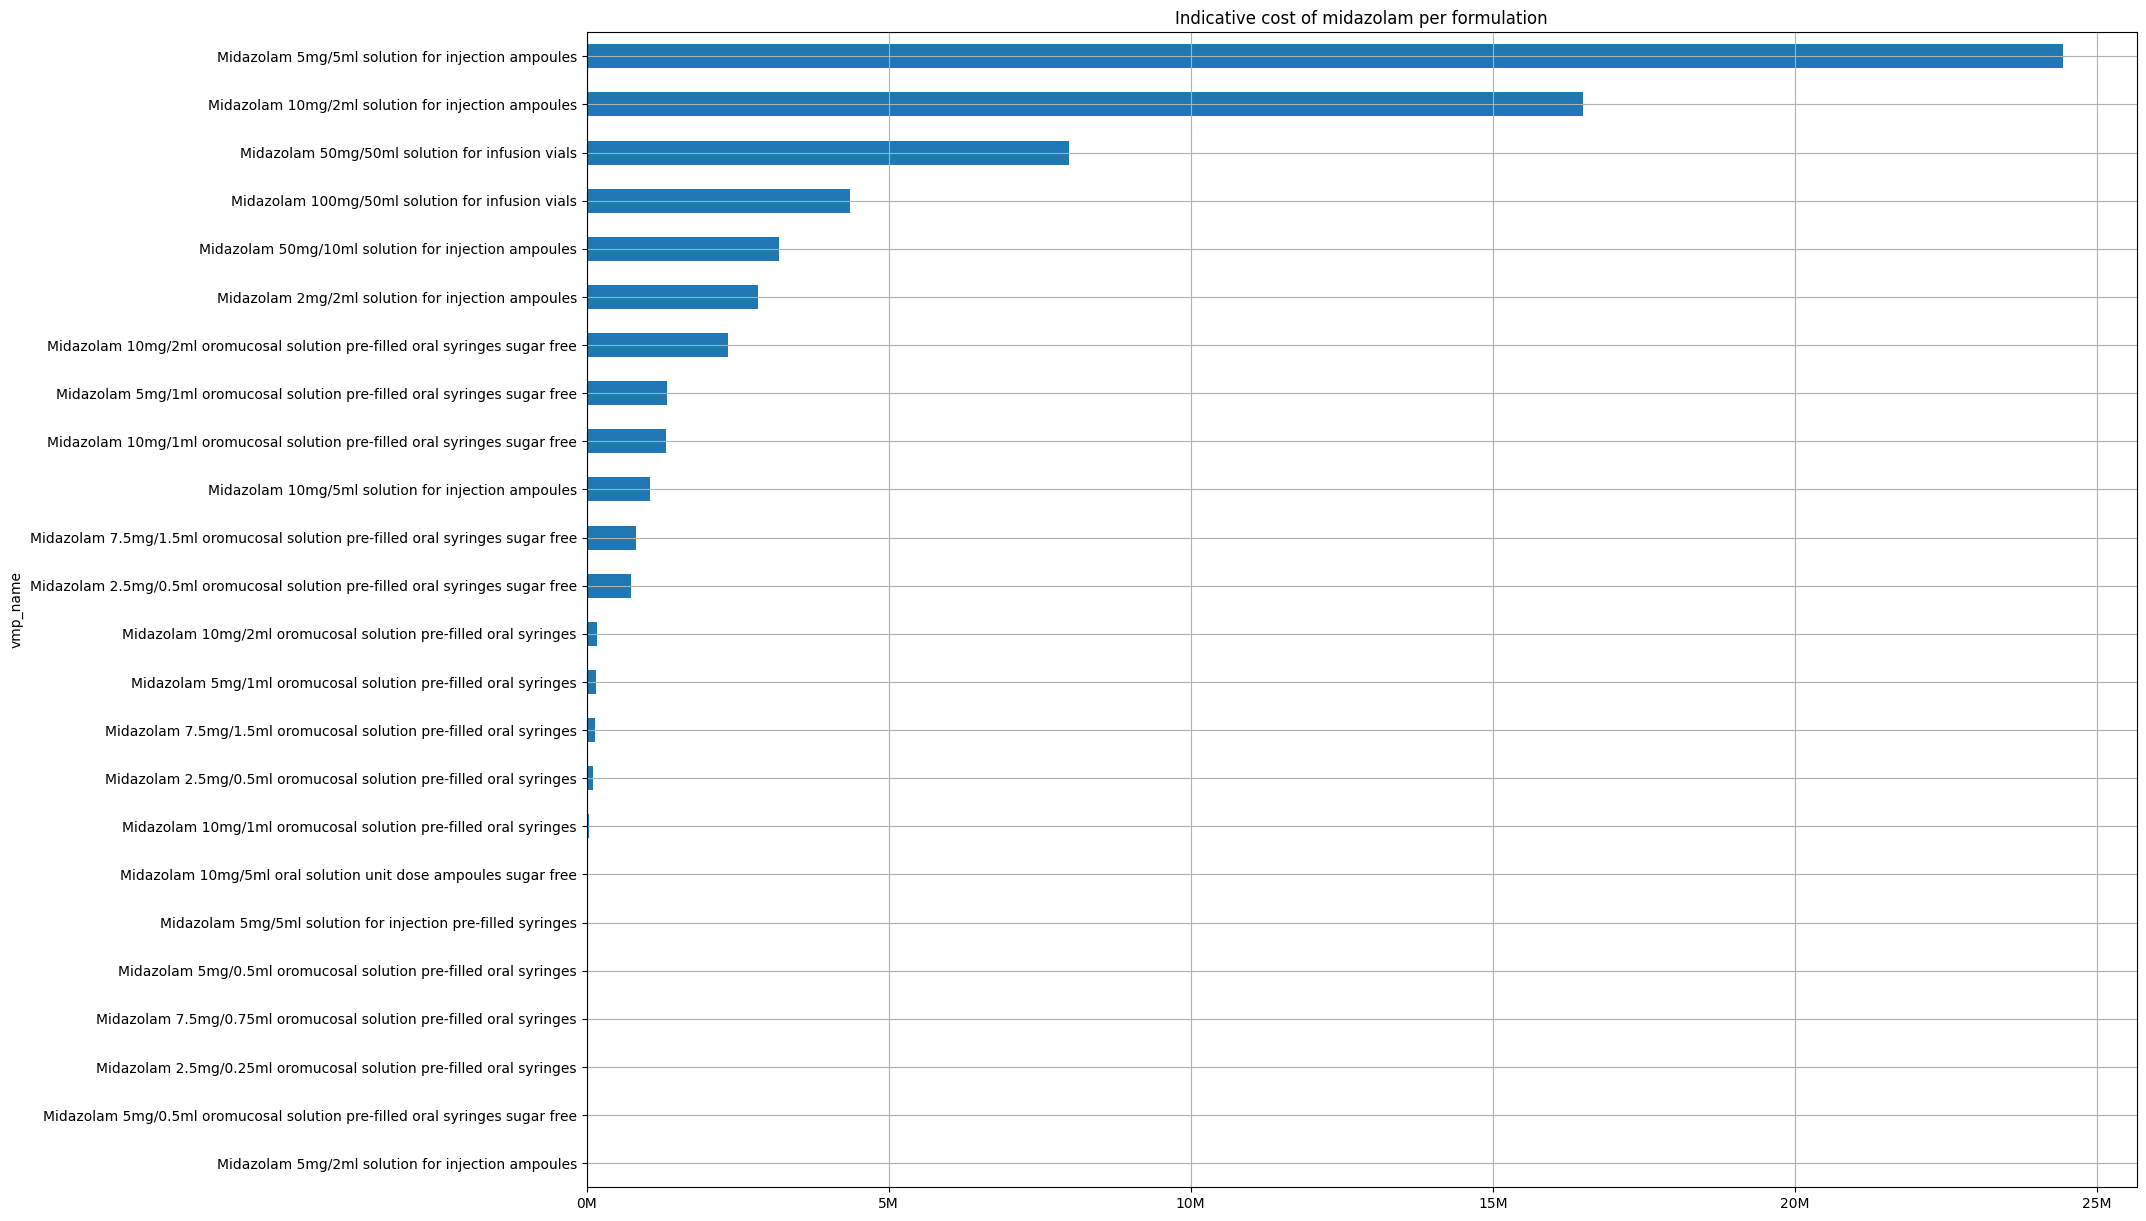

In [133]:
figure = plt.figure(figsize=(20,15))

# plt.ticklabel_format(style="plain")
plt.xlabel("Indicative Cost")

df_midazolam_injectables.groupby("vmp_name")["indicative_cost"].sum().sort_values(ascending=True).plot(kind="barh")

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)

plt.title("Indicative cost of midazolam per formulation")
plt.grid()
plt.show()

yearly usage of midazolam per trust

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/3199000870.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(formatted_labels)


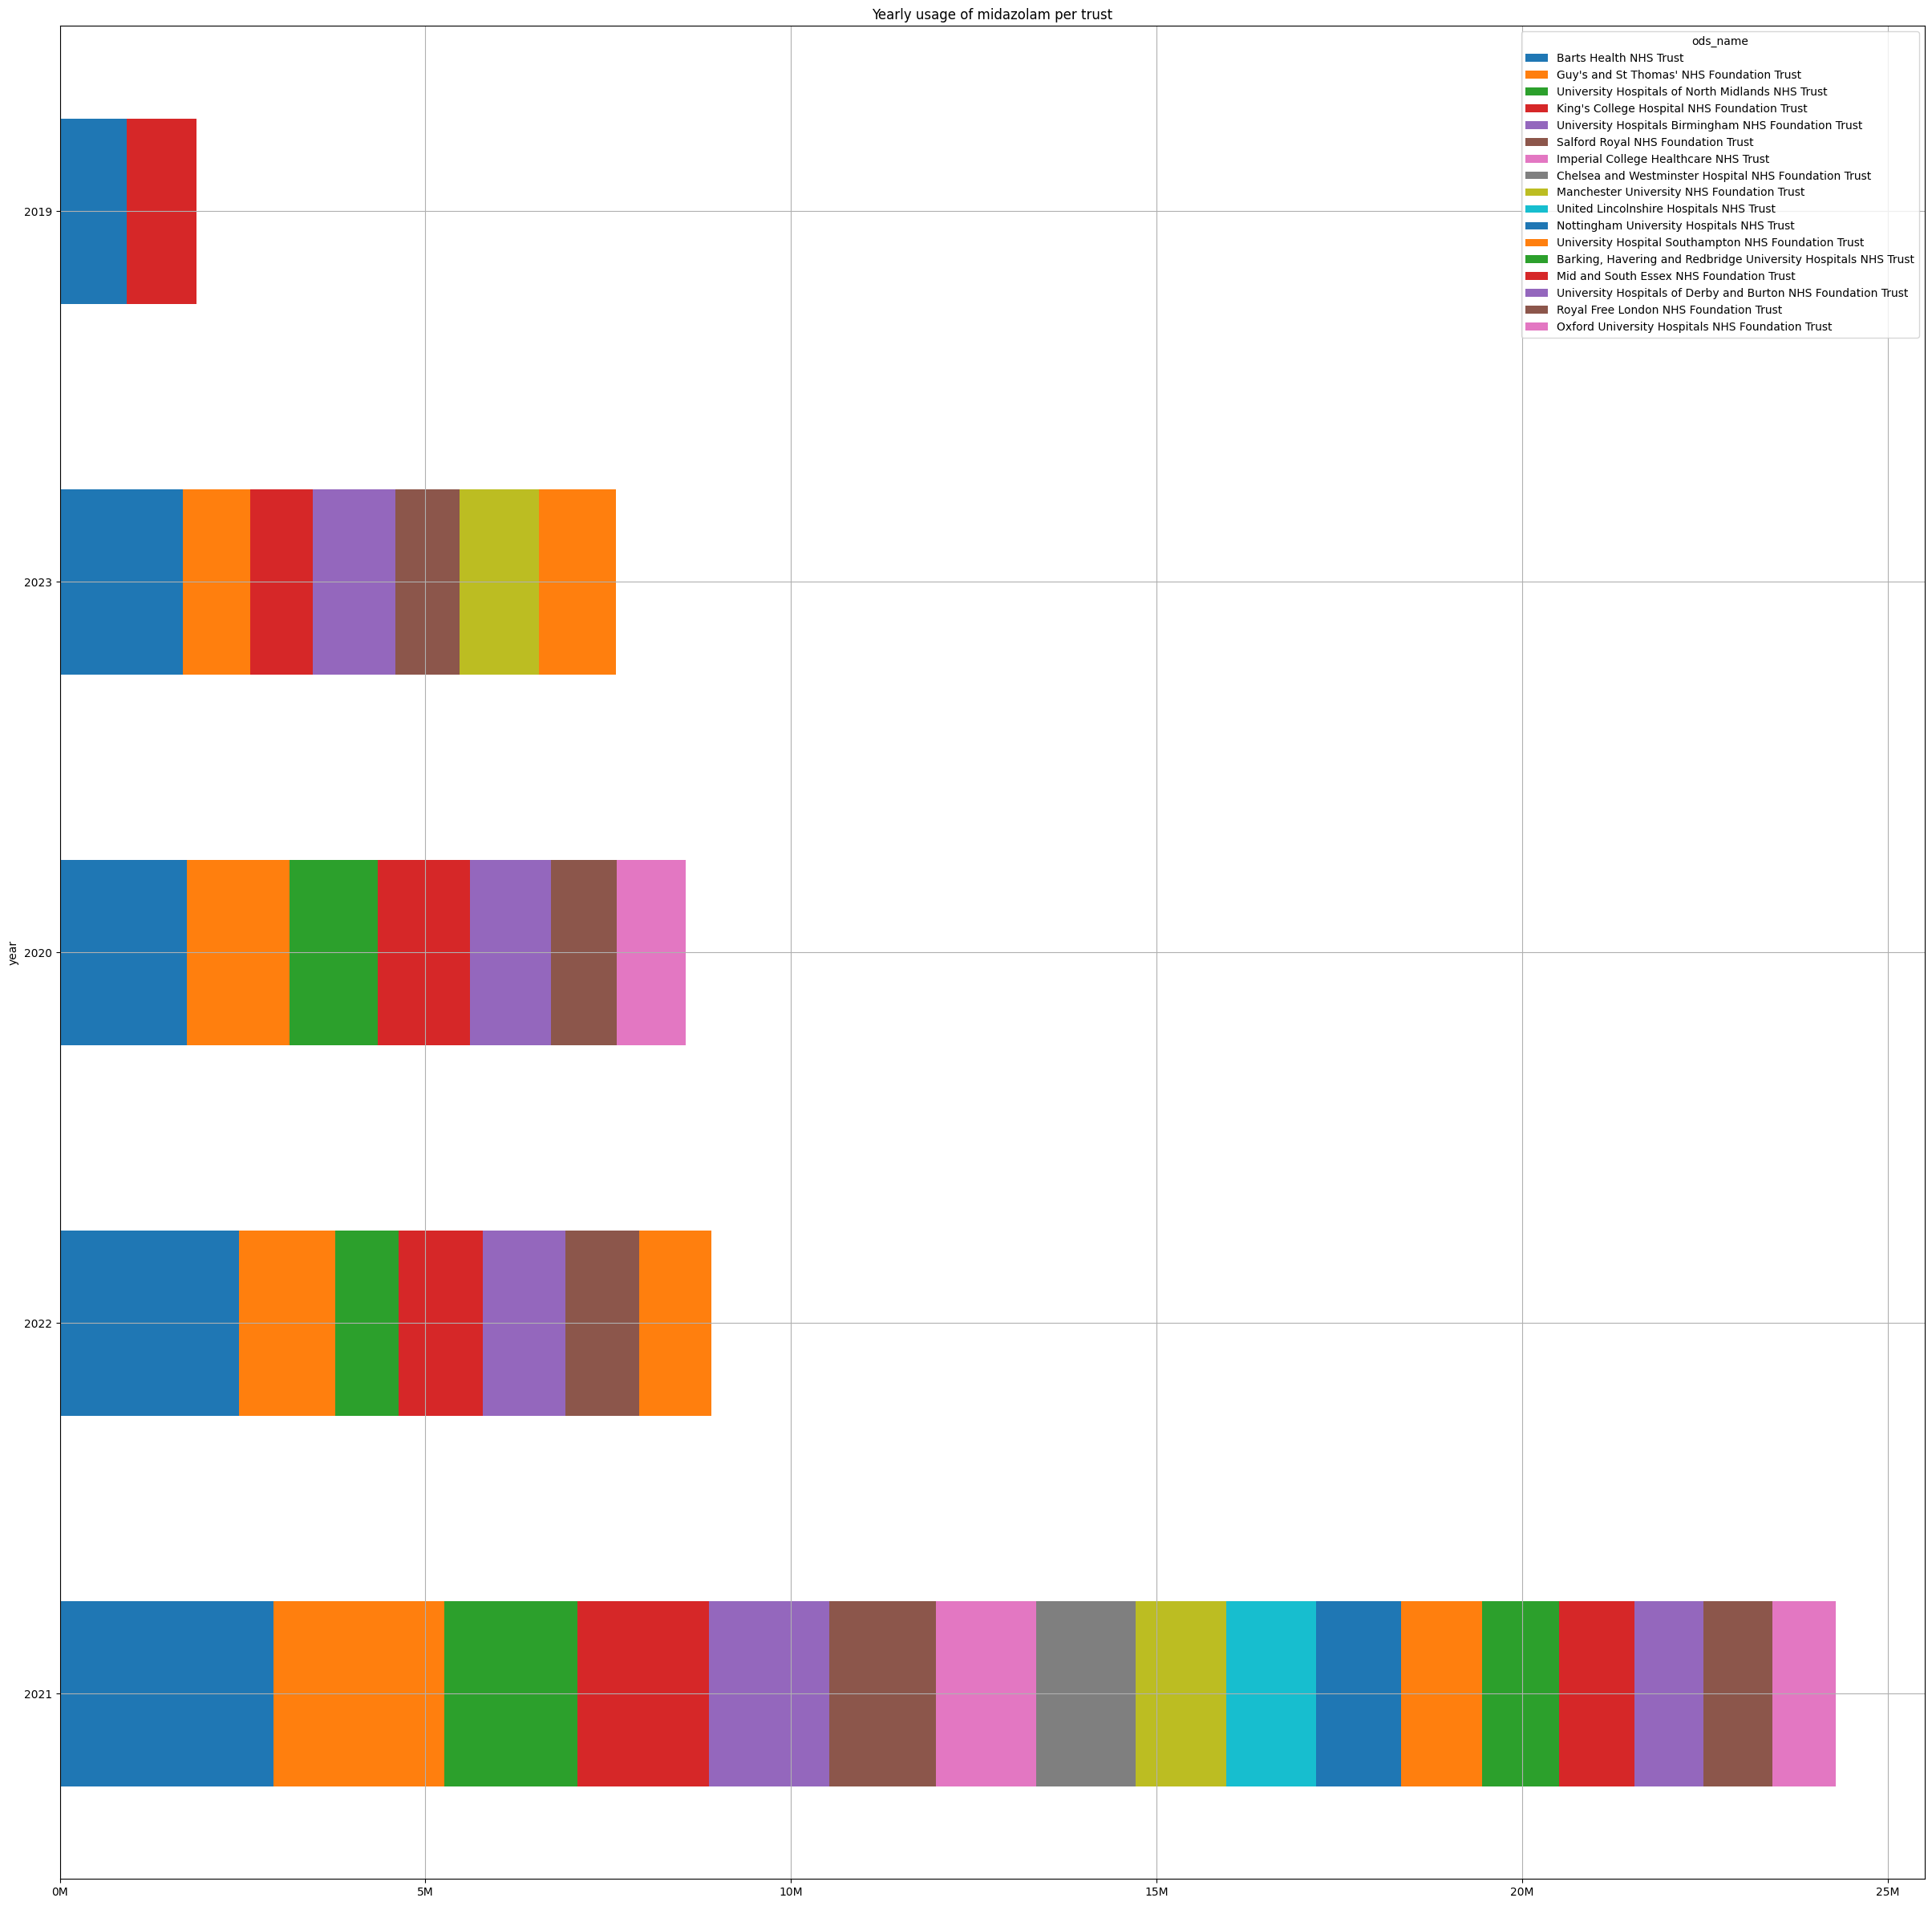

In [134]:
ax = df_midazolam_injectables.groupby(["year", "ods_name"])["quantity"].sum().sort_values(ascending=False)[:40].unstack().plot(kind="barh", figsize=(30,30), stacked=True)

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)

plt.title("Yearly usage of midazolam per trust")
plt.grid()
plt.show()

yearly usage of midazolam

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/3520737952.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


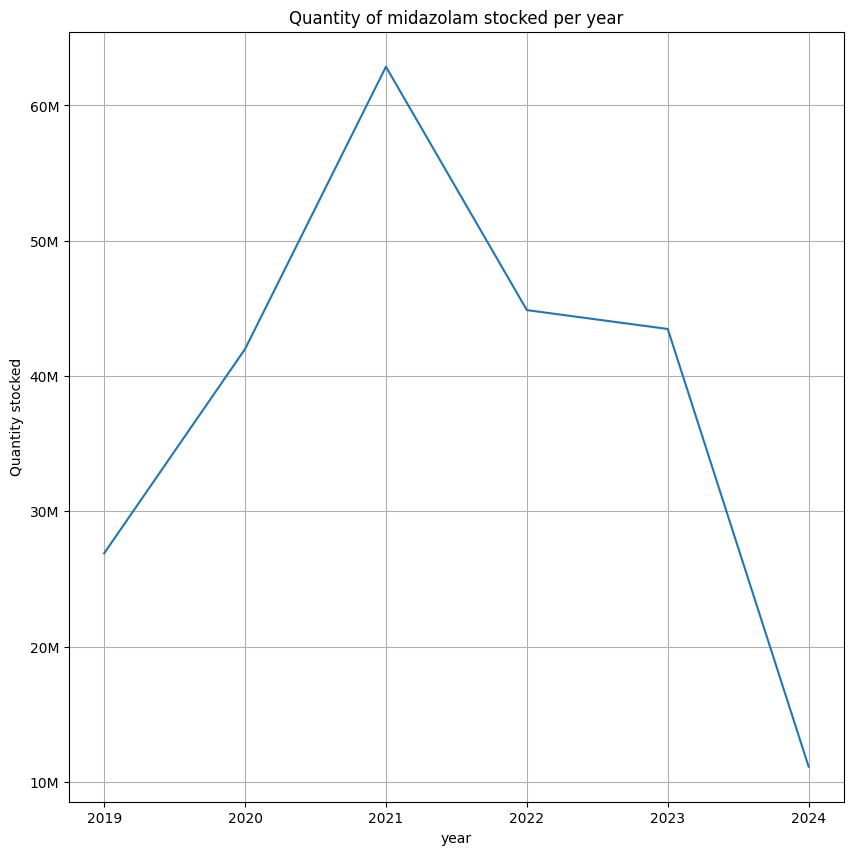

In [136]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_ylabel("Quantity stocked")
ax.set_xlabel("Year")

df_midazolam_injectables.groupby("year")["quantity"].sum().plot()

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Quantity of midazolam stocked per year")
plt.grid()
plt.show()

monthly usage of midazolam per trust

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/1871070540.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(formatted_labels)


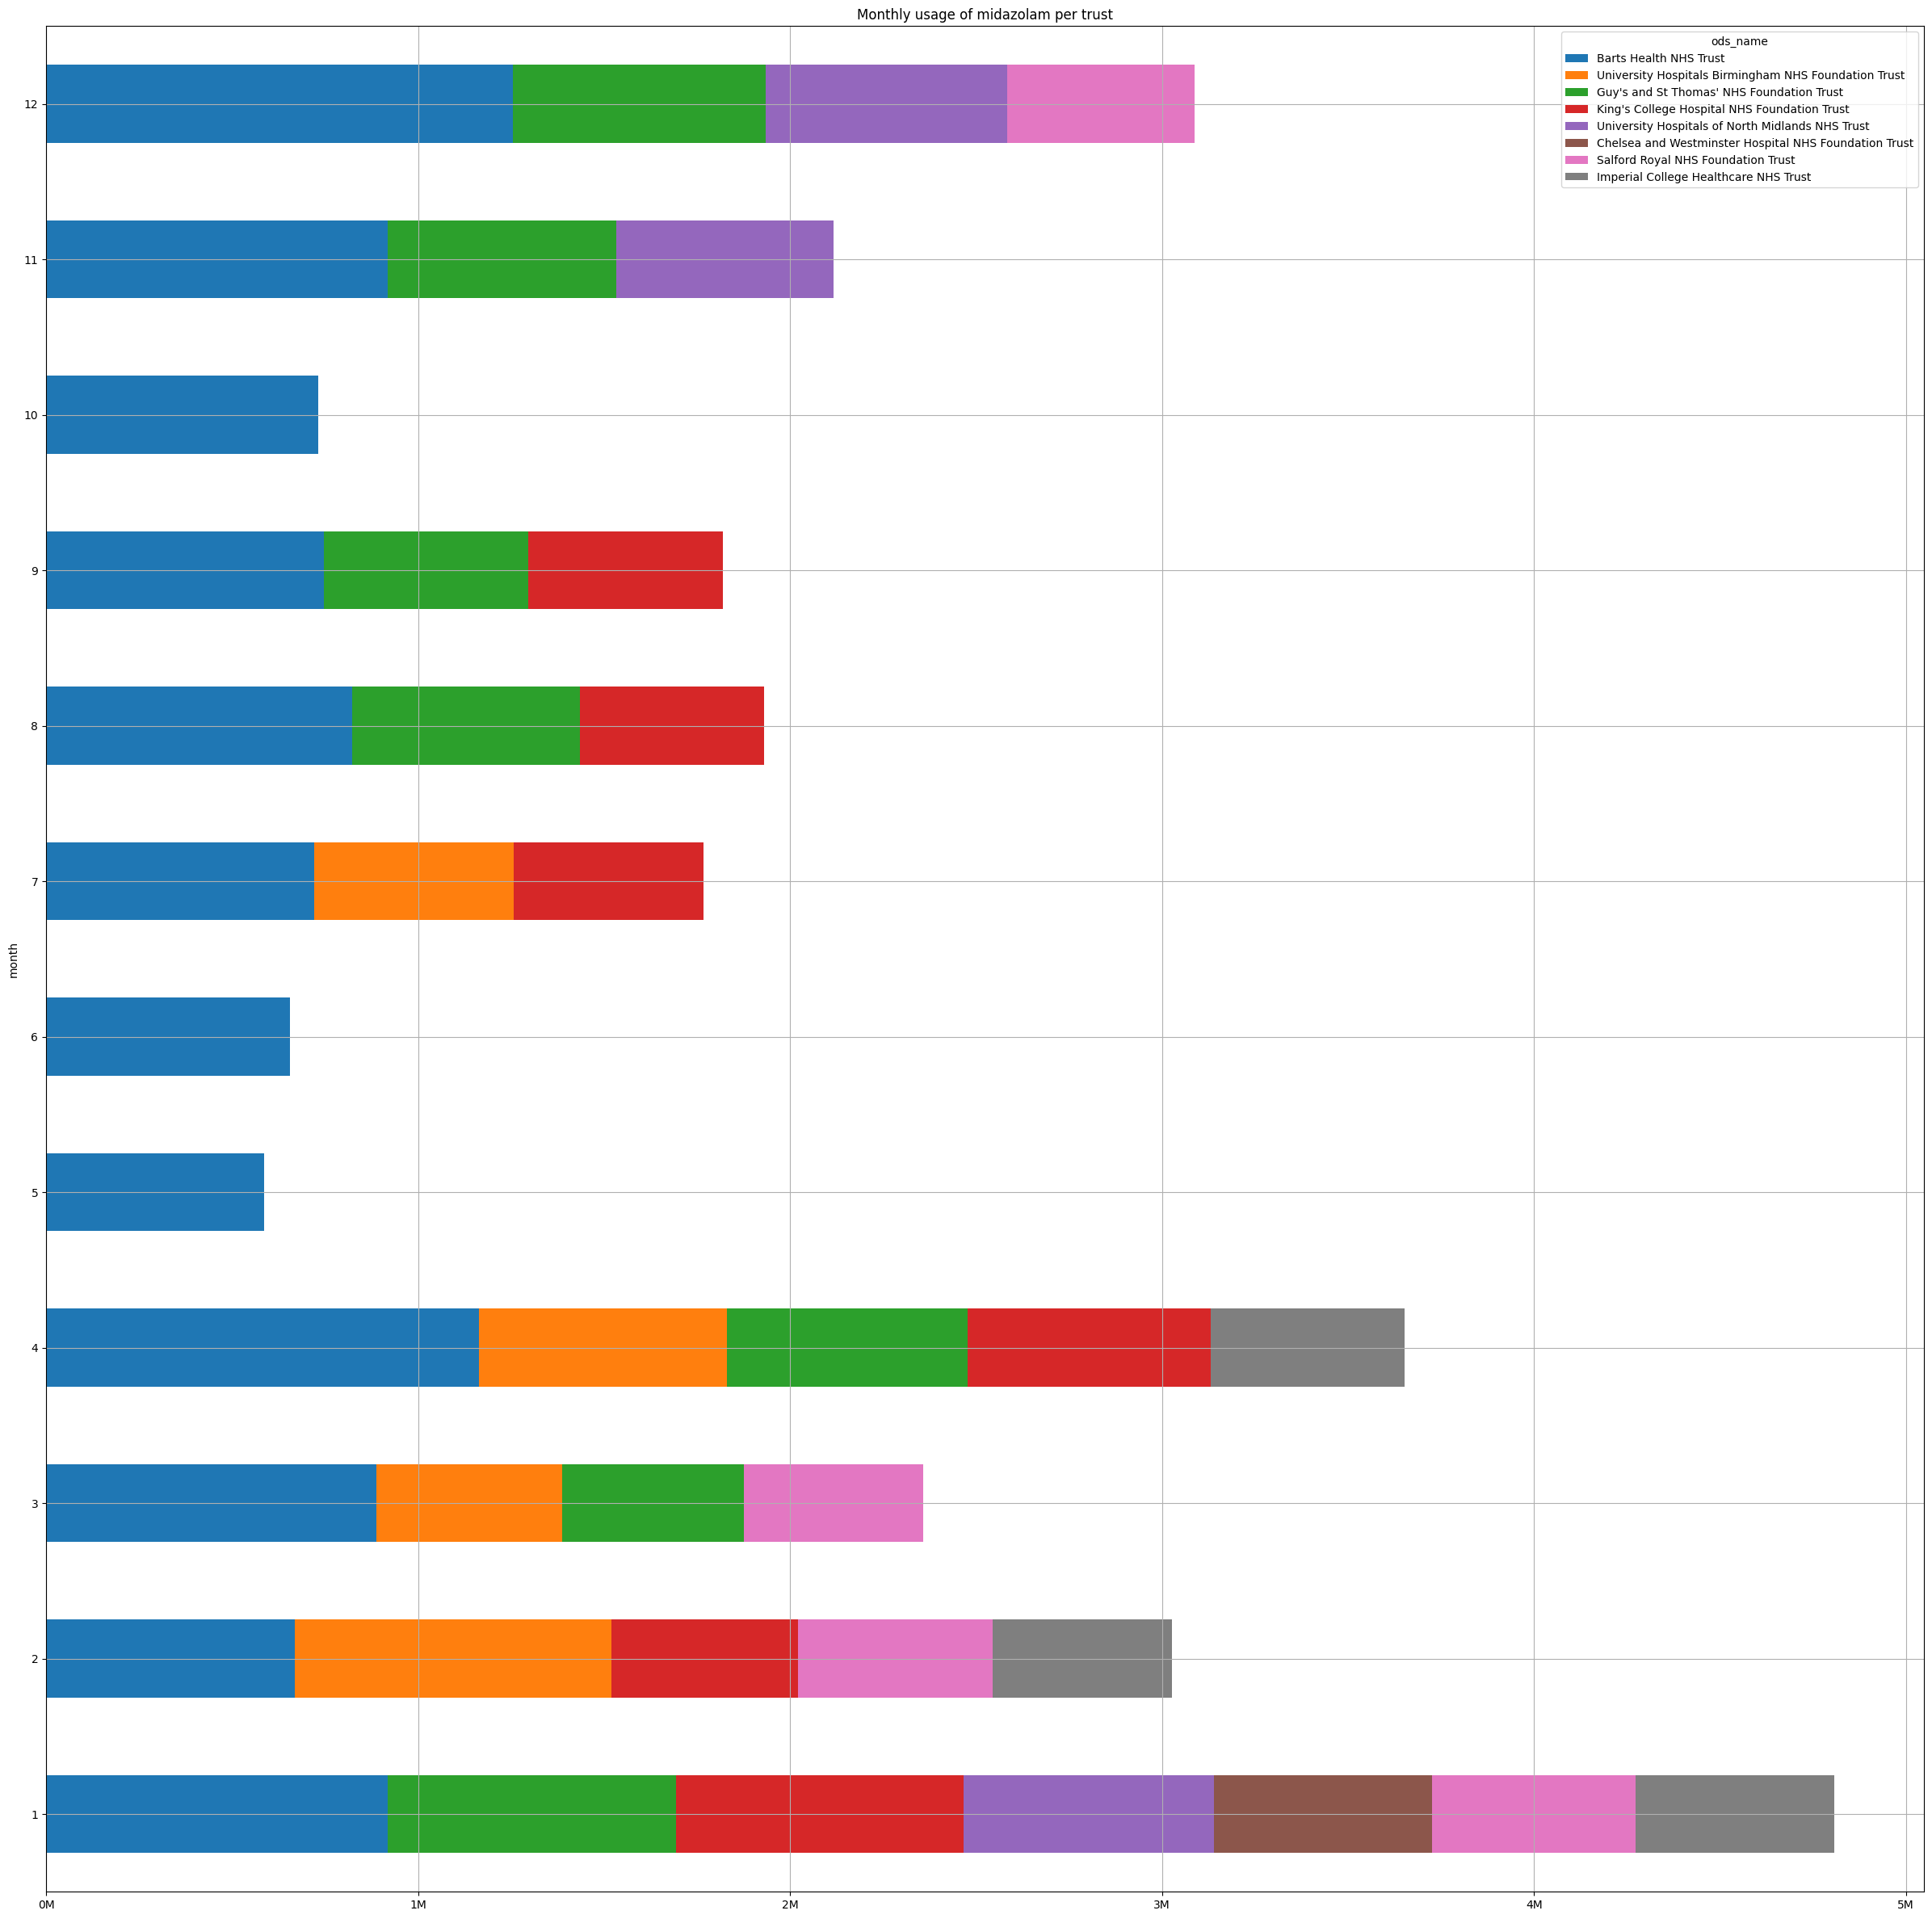

In [137]:
df_midazolam.groupby(["month", "ods_name"])["quantity"].sum().sort_values(ascending=False)[:40].unstack().plot(kind="barh", figsize=(30,30), stacked=True)

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)

plt.title("Monthly usage of midazolam per trust")
plt.grid()
plt.show()

formulations mostly used

There are 24 VMPs of midazolam stocked


/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_58396/2393552172.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


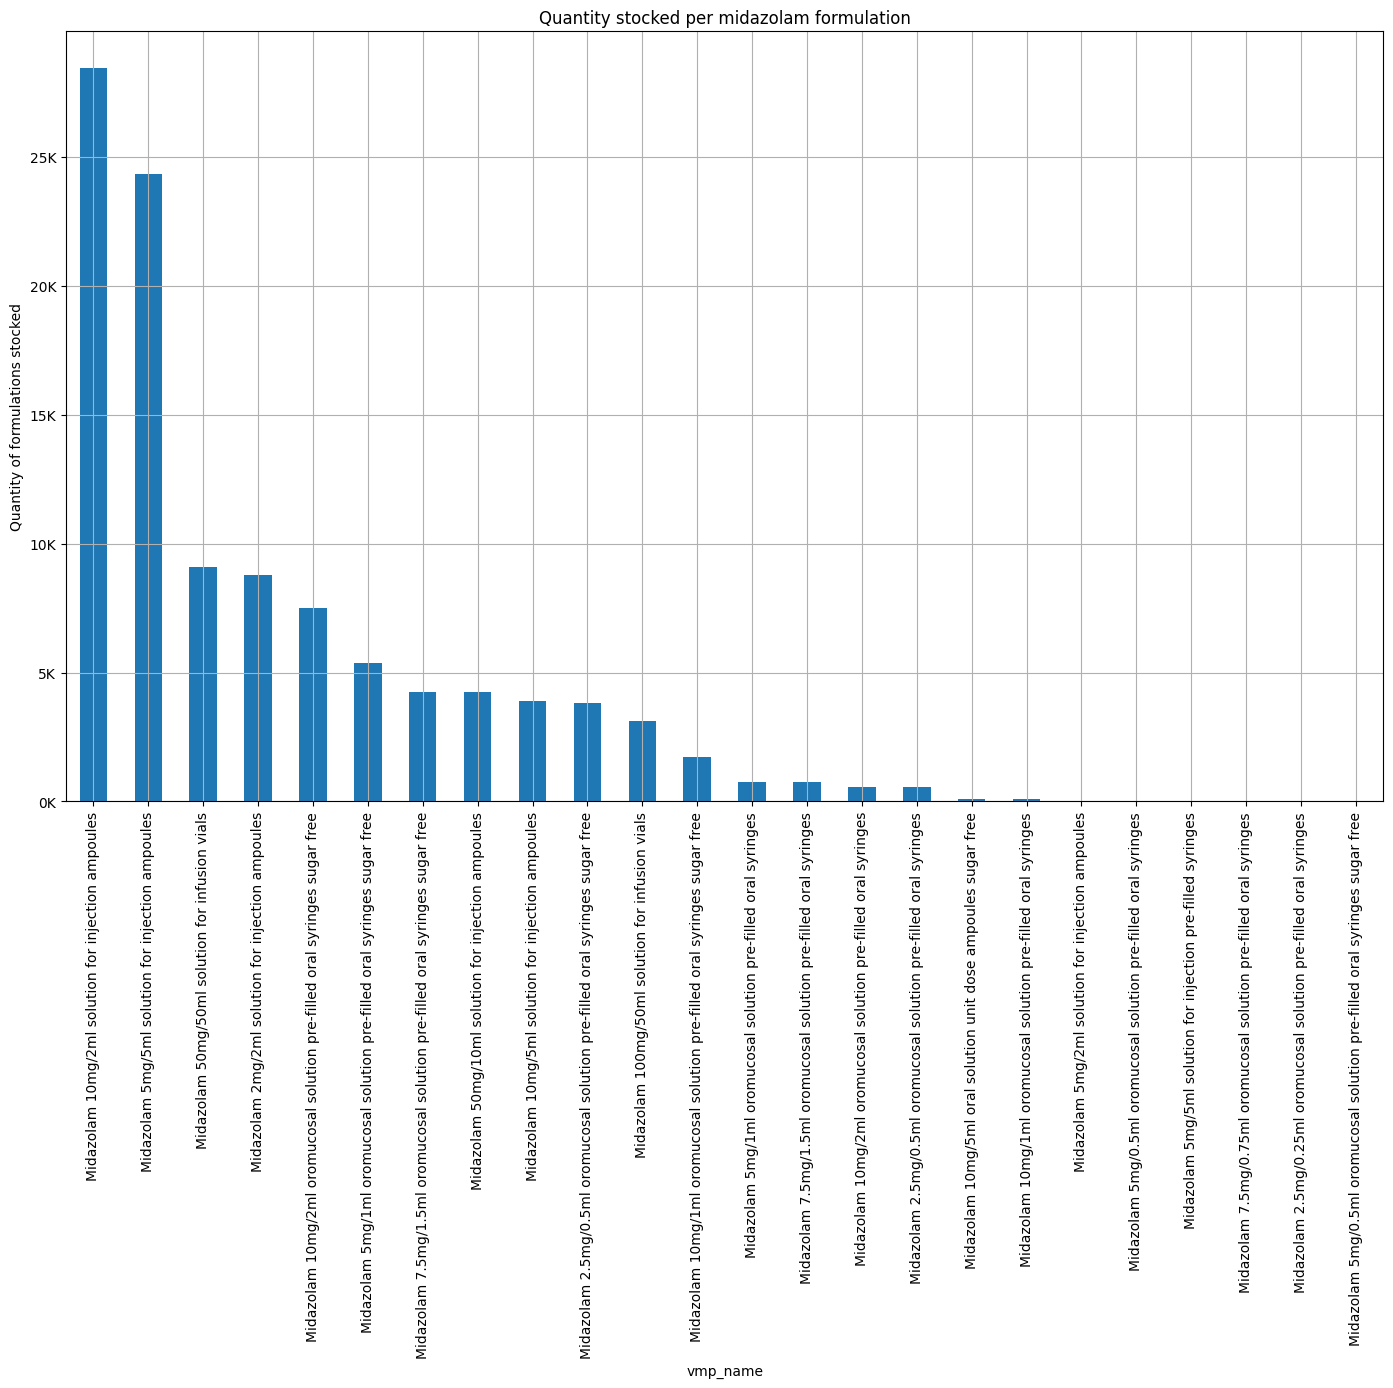

In [139]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Quantity of formulations stocked")
# plt.xlabel("Year")

print(f"There are {len(df_midazolam['vmp_name'].unique())} VMPs of midazolam stocked")
df_midazolam["vmp_name"].value_counts().plot(kind="bar", figsize=(17, 10))

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Quantity stocked per midazolam formulation")
plt.grid()
plt.show()

In [ ]:
df_midazolam["vmp_name"].value_counts().sort_values(ascending=False)[:10]